# Industry-Specific AI Integration & Transformation

**Name**

Yu-Chih (Wisdom) Chen

**Date**

03/01/2024

#### Install Packages

In [ ]:
!python -m spacy download en_core_web_md
!pip install contractions
!pip install pyspark
!pip install nltk vaderSentiment
!pip install transformers
!pip install unidecode
!pip install lxml
!pip install pandarallel
!pip install spacy
!pip install gensim
!pip install bertopic
!pip install pyLDAvis
!pip3 install lxml
!pip install tensorflow
!pip install bokeh
!pip install scikit-optimize
!pip install tensorflow
!pip install ktrain
!pip install tika
!pip install google-cloud-language
!pip install spacytextblob
!pip install -U pip setuptools wheel
!pip install spacy[cuda120]
# sudo apt-get install libxml2-dev libxslt-dev python-dev
# conda install -c conda-forge cupy cuda-version=12.0

#### Load Packages

In [4]:
from pyspark.sql import SparkSession
import time
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import requests
import copy
import re
import collections
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.manifold import TSNE
import unidecode
import contractions
from bs4 import BeautifulSoup
from lxml import html
from itertools import combinations
import string
from operator import add
from itertools import islice
from pandarallel import pandarallel
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from sklearn.pipeline import make_pipeline
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.util import ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.probability import FreqDist
from ast import literal_eval

import spacy
spacy.require_gpu()
from gensim import corpora
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from transformers.pipelines import pipeline

from umap import UMAP
from hdbscan import HDBSCAN
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

from gensim.models import CoherenceModel, LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.ldamulticore import LdaMulticore

import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, BartForSequenceClassification, BartTokenizer
from sklearn.metrics.pairwise import cosine_similarity
# from transformers import pipeline
from bertopic.representation import ZeroShotClassification, KeyBERTInspired, MaximalMarginalRelevance
import torch.nn as nn
import torch.nn.functional as F
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
import bokeh
import ktrain
from ktrain import text

from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

from google.cloud import storage
import joblib
from joblib import load
from joblib import dump

# Ensure you have the necessary NLTK data downloaded
nltk.download('punkt')
# Download stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('vader_lexicon')
# Define stopwords
stop_words = set(stopwords.words('english'))

# Spacy for NER Method

nlp_ner = spacy.load("en_core_web_md")
nlp = spacy.load("en_core_web_md", disable=['parser', 'ner'])

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /home/jupyter/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
import multiprocessing
from multiprocessing import Pool
num_processors = multiprocessing.cpu_count()
print(f'Available CPUs: {num_processors}')

Available CPUs: 8


In [6]:
## GCP
pandarallel.initialize(nb_workers=num_processors-1, use_memory_fs=False)

INFO: Pandarallel will run on 7 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [23]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_colwidth', None)

# Load the Data

In [4]:
%%time

df_news_final_project = pd.read_parquet('https://storage.googleapis.com/msca-bdp-data-open/news_final_project/news_final_project.parquet', engine='pyarrow')
df_news_final_project.shape

CPU times: user 8.27 s, sys: 5 s, total: 13.3 s
Wall time: 15.5 s


(200435, 5)

In [7]:
df_news_final_project.head()

url  \
0  http://galusaustralis.com/2020/02/486473/legaltech-artificial-intelligence-market-2019-technology-advancement-and-future-scope-casetext-inc-catalyst-repository-systems-ebrevia/   
1                                          http://newsparliament.com/2020/02/27/children-with-autism-saw-their-learning-and-social-skills-boosted-after-playing-with-this-ai-robot/   
2                                                                                                                             http://www.agoravox.it/Covid-19-un-messaggio-dai.html   
3              http://www.desototimes.com/news/child-actor-claude-jarman-jr-looks-back-on-his-movie-career-during-the-golden-days/article_0b310fae-e767-11ec-982e-a380305dda2f.html   
4                                                                  http://www.millenniumpost.in/big-stories/ai-express-aircraft-skids-off-runaway-in-kozhikode-rescue-ops-on-414926   

         date language  \
0  2020-02-26       en   
1  2020-02-27       en   
2  2020-03-13       en   
3  2022-06-09       en   
4  2020-08-07       en   

                                                                                                                                                           title  \
0  LegalTech Artificial Intelligence Market 2019 Technology Advancement and Future Scope – Casetext Inc., Catalyst Repository Systems, eBREVIA – Galus Australis   
1                                           Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament   
2                                                                        Covid-19: un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia   
3                                    Child actor Claude Jarman Jr. looks back on his movie career during the “Golden Days” of Hollywood | News | desototimes.com   
4                                                                                                      Two dead as AI Express flight skids off Kozhikode airport   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [5]:
# Filter non-English tweets
df = df_news_final_project[df_news_final_project['language']=='en'].reset_index(drop=True)
df = df[['url', 'date','title', 'text']]
df.shape

(200435, 4)

## 1. Clean up the Text Data

In [6]:
# List of keywords to remove from the text
keywords_to_remove = [
    "Log In", "Sign Up", "Subscribe", "Read More", "Advertisement", "Privacy Policy", "Cookie Policy",
    "Terms of Use", "Terms and Conditions", "Search", "Menu", "Skip to content", "Footer", "Top", "Back to top",
    "Scroll down", "All Rights Reserved", "Copyright", "Copyright ©", "©", "Trademark", "Patent",
    "All rights reserved", "Copyright Notice", "Share", "Tweet", "Follow us", "Like", "Share on Facebook",
    "Tweet on Twitter", "Comments", "No Comments", "Add a Comment",
    "Post a Comment", "Leave a Reply", "Leave a Comment", "Newsletter", "Subscribe to our newsletter", "Print",
    "Print this page", "Download", "Download PDF", "Citation", "Site Map", "Feedback", "Contact Us", "FAQ",
    "Frequently Asked Questions", "Help", "Customer Service", "Next", "Previous", "Page 1", "Page 2", "Related Articles",
    "Related Posts", "Read Next", "Recommended"
]

# Compile a regex pattern to match any of the keywords to remove
regex_pattern = '|'.join(re.escape(keyword) for keyword in keywords_to_remove)

def clean_text_whole(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "lxml").get_text(separator=" ").replace('\n', ' ').replace('\r', '')

    # Remove URLs
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    text = re.sub(url_pattern, '', text)

    # Remove JS and CSS
    js_pattern = r'<script[^>]*>([\S\s]*?)<\/script>'
    css_pattern = r'<style[^>]*>([\S\s]*?)<\/style>'
    text = re.sub(js_pattern, '', text)
    text = re.sub(css_pattern, '', text)

    # Remove email addresses
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    text = re.sub(email_pattern, '', text)

    # Remove non-ASCII characters
    text = unidecode.unidecode(text)

    # Expand contractions
    text = contractions.fix(text)

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[\d]', '', text)

    # Remove extra whitespaces
    text = ' '.join(text.split())

    # Remove keywords
    text = re.sub(regex_pattern, '', text, flags=re.IGNORECASE)

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Strip leading and trailing spaces
    text = text.strip()

    return text

In [13]:
# List of AI-related keywords to check in titles
keywords = [
    'ai', 'artificial intelligence', 'llm', 'large language models',
    'conversational ai', 'openai', 'chatgpt', 'gpt', 'bard', 'google bard',
    'llama', 'chatbot', 'transformer', 'bert', 'machine learning',
    'deep learning', 'data science', 'neural networks', 'nlp',
    'natural language processing', 'intelligent systems', 'cognitive computing',
    'reinforcement learning', 'computer vision', 'text generation', 'pretrained models'
]

# Compile a regex pattern to match any of the AI-related keywords
pattern = '(?i)' + '|'.join(keywords)

def clean_title_whole(title):
    # Remove HTML tags
    title = BeautifulSoup(title, "lxml").get_text(separator=" ").replace('\n', ' ').replace('\r', '')

    # Remove URLs
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    title = re.sub(url_pattern, '', title)

    # Remove JS and CSS
    js_pattern = r'<script[^>]*>([\S\s]*?)<\/script>'
    css_pattern = r'<style[^>]*>([\S\s]*?)<\/style>'
    title = re.sub(js_pattern, '', title)
    title = re.sub(css_pattern, '', title)

    # Remove email addresses
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    title = re.sub(email_pattern, '', title)

    # Remove non-ASCII characters
    title = unidecode.unidecode(title)

    # Expand contractions
    title = contractions.fix(title)

    # Convert to lowercase
    title = title.lower()

    # Remove special characters and digits
    title = re.sub(r'[^\w\s]', '', title)
    title = re.sub(r'[\d]', '', title)

    # Remove extra whitespaces
    title = ' '.join(title.split())

    # Remove stopwords
    title = ' '.join([word for word in title.split() if word not in stop_words])

    # Strip leading and trailing spaces
    title = title.strip()

    return title

### 1.2 Cleaning the Text Data for Analysis NER Method

In [8]:
keywords_to_remove = [
    "Log In", "Sign Up", "Subscribe", "Read More", "Advertisement", "Privacy Policy", "Cookie Policy",
    "Terms of Use", "Terms and Conditions", "Search", "Menu", "Skip to content", "Footer", "Top", "Back to top",
    "Scroll down", "All Rights Reserved", "Copyright", "Copyright ©", "©", "Trademark", "Patent",
    "All rights reserved", "Copyright Notice", "Share", "Tweet", "Follow us", "Like", "Share on Facebook",
    "Tweet on Twitter", "Comments", "No Comments", "Add a Comment",
    "Post a Comment", "Leave a Reply", "Leave a Comment", "Newsletter", "Subscribe to our newsletter", "Print",
    "Print this page", "Download", "Download PDF", "Citation", "Site Map", "Feedback", "Contact Us", "FAQ",
    "Frequently Asked Questions", "Help", "Customer Service", "Next", "Previous", "Page 1", "Page 2", "Related Articles",
    "Related Posts", "Read Next", "Recommended"
]

# Compile a regex pattern to match any of the keywords to remove
regex_pattern = '|'.join(re.escape(keyword) for keyword in keywords_to_remove)


def clean_text_ner(text):

    # Remove HTML tags
    text = BeautifulSoup(text, "lxml").get_text(separator=" ").replace('\n', ' ').replace('\r', '')

    # Remove URLs
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    text = re.sub(url_pattern, '', text)

    # Remove JS and CSS
    js_pattern = r'<script[^>]*>([\S\s]*?)<\/script>'
    css_pattern = r'<style[^>]*>([\S\s]*?)<\/style>'
    text = re.sub(js_pattern, '', text)
    text = re.sub(css_pattern, '', text)

    # Remove email addresses
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    text = re.sub(email_pattern, '', text)

    # Remove non-ASCII characters
    text = unidecode.unidecode(text)

    # Expand contractions
    text = contractions.fix(text)

    # Remove extra whitespaces
    text = ' '.join(text.split())

    # Remove keywords
    text = re.sub(regex_pattern, '', text, flags=re.IGNORECASE)

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Strip leading and trailing spaces
    text = text.strip()

    return text.strip()

In [41]:
# List of AI-related keywords to check in titles
keywords_ner = [
    'ai', 'AI', 'Ai',
    'artificial intelligence', 'ARTIFICIAL INTELLIGENCE', 'Artificial Intelligence',
    'llm', 'LLM', 'Llm',
    'large language models', 'LARGE LANGUAGE MODELS', 'Large Language Models',
    'conversational ai', 'CONVERSATIONAL AI', 'Conversational Ai',
    'openai', 'OPENAI', 'Openai',
    'chatgpt', 'CHATGPT', 'Chatgpt',
    'gpt', 'GPT', 'Gpt',
    'bard', 'BARD', 'Bard',
    'google bard', 'GOOGLE BARD', 'Google Bard',
    'llama', 'LLAMA', 'Llama',
    'chatbot', 'CHATBOT', 'Chatbot',
    'transformer', 'TRANSFORMER', 'Transformer',
    'bert', 'BERT', 'Bert',
    'machine learning', 'MACHINE LEARNING', 'Machine Learning',
    'deep learning', 'DEEP LEARNING', 'Deep Learning',
    'data science', 'DATA SCIENCE', 'Data Science',
    'neural networks', 'NEURAL NETWORKS', 'Neural Networks',
    'nlp', 'NLP', 'Nlp',
    'natural language processing', 'NATURAL LANGUAGE PROCESSING', 'Natural Language Processing',
    'intelligent systems', 'INTELLIGENT SYSTEMS', 'Intelligent Systems',
    'cognitive computing', 'COGNITIVE COMPUTING', 'Cognitive Computing',
    'reinforcement learning', 'REINFORCEMENT LEARNING', 'Reinforcement Learning',
    'computer vision', 'COMPUTER VISION', 'Computer Vision',
    'text generation', 'TEXT GENERATION', 'Text Generation',
    'pretrained models', 'PRETRAINED MODELS', 'Pretrained Models'
]

# Compile a regex pattern to match any of the AI-related keywords
pattern = '(?i)' + '|'.join(keywords_ner)

def clean_title_ner(title):
    # Remove HTML tags
    title = BeautifulSoup(title, "lxml").get_text(separator=" ").replace('\n', ' ').replace('\r', '')

    # Remove URLs
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    title = re.sub(url_pattern, '', title)

    # Remove JS and CSS
    js_pattern = r'<script[^>]*>([\S\s]*?)<\/script>'
    css_pattern = r'<style[^>]*>([\S\s]*?)<\/style>'
    title = re.sub(js_pattern, '', title)
    title = re.sub(css_pattern, '', title)

    # Remove email addresses
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    title = re.sub(email_pattern, '', title)

    # Remove non-ASCII characters
    title = unidecode.unidecode(title)

    # Expand contractions
    title = contractions.fix(title)

    # Remove extra whitespaces
    title = ' '.join(title.split())

    # Remove stopwords
    title = ' '.join([word for word in title.split() if word not in stop_words])

    # Strip leading and trailing spaces
    title = title.strip()

    return title

### 1.3 Implement Both Cleaning Method

In [10]:
%%time

def clean_and_tokenize_dataframe(data):
    data['text'] = data['text'].astype(str)
    data['text_cleaned'] = data['text'].parallel_apply(clean_text_whole)
    data['text_tokens'] = data['text_cleaned'].parallel_apply(word_tokenize)

    data['title'] = data['title'].astype(str)
    data['title_cleaned'] = data['title'].parallel_apply(clean_title_whole)
    
    # Check for AI-related keywords in cleaned titles
    data['title_contains_ai_keywords'] = data['title_cleaned'].str.contains(pattern)
    # Filter the dataframe to include only entries with titles containing AI-related keywords
    data = data[data['title_contains_ai_keywords'] == True].reset_index(drop=True)
    data['title_tokens'] = data['title_cleaned'].parallel_apply(word_tokenize)

 
    ## NER
    data['text_cleaned_ner'] = data['text'].parallel_apply(clean_text_ner)
    data['text_tokens_ner'] = data['text_cleaned_ner'].parallel_apply(word_tokenize)
    
    data['title_cleaned_ner'] = data['title'].parallel_apply(clean_title_ner)
    data['title_contains_ai_keywords_ner'] = data['title_cleaned_ner'].str.contains(pattern)
    data = data[data['title_contains_ai_keywords_ner'] == True].reset_index(drop=True)
    data['title_tokens_ner'] = data['title_cleaned_ner'].parallel_apply(word_tokenize)

    return data

# Apply the cleaning and filtering function to your dataframe
df = clean_and_tokenize_dataframe(df)

CPU times: user 1min 30s, sys: 1min 45s, total: 3min 16s
Wall time: 18min 9s


**Cleaned Text Data**

In [11]:
df_cleaned = df[['url', 'date', 'title', 'title_cleaned', 'title_tokens','title_contains_ai_keywords', 'text_cleaned', 'text_tokens']]

In [12]:
df_cleaned.shape

(195704, 8)

In [12]:
print(f"[INFO] Average token count: {int(np.round(df_cleaned['text_tokens'].parallel_apply(len).mean()))}")

[INFO] Average token count: 795


In [13]:
df_cleaned = df_cleaned[df_cleaned['text_tokens'].apply(lambda x: 300 <= len(x) <= 13000)]

In [14]:
#183862
df_cleaned.shape

(183862, 8)

**NER Text Data**

In [15]:
df_ner = df[['url', 'date', 'title', 'title_cleaned_ner', 'title_tokens_ner','title_contains_ai_keywords_ner', 'text_cleaned_ner', 'text_tokens_ner']]

In [22]:
df_ner.shape

(195704, 7)

In [19]:
print(f"[INFO] Average token count: {int(np.round(df_ner['text_tokens_ner'].parallel_apply(len).mean()))}")

[INFO] Average token count: 1054


In [20]:
print(f"[INFO] Min token count: {int(np.round(df_ner['text_tokens_ner'].parallel_apply(len).min()))}")

[INFO] Min token count: 4


In [21]:
print(f"[INFO] Max token count: {int(np.round(df_ner['text_tokens_ner'].parallel_apply(len).max()))}")

[INFO] Max token count: 121714


In [16]:
df_ner = df_ner[df_ner['text_tokens_ner'].apply(lambda x: 300 <= len(x) <= 13000)]

In [17]:
df_ner.shape

(189045, 8)

**Save the Cleaned & NER Data Part 1**

In [18]:
df_cleaned.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/cleaned_data_part_1.parquet")

In [19]:
# df_ner.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/ner_data_part_1.parquet")

## 2. Discard Irrelevant Articles

**Cleaned Text**

In [4]:
df_cleaned = pd.read_parquet('gs://wisdom-final-nlp-final/NLP_Project/cleaned_data_part_1.parquet', engine='pyarrow')

In [5]:
keywords = [
    'ai', 'artificial intelligence', 'llm', 'large language models',
    'conversational ai', 'openai', 'chatgpt', 'gpt', 'bard', 'google bard',
    'llama', 'chatbot', 'transformer', 'bert', 'machine learning',
    'deep learning', 'data science', 'neural networks', 'nlp',
    'natural language processing', 'intelligent systems', 'cognitive computing',
    'reinforcement learning', 'computer vision', 'text generation', 'pretrained models', 'automate',
    'productivity', 'generative ai', 'image generation', 'ai impact', 'job automation', 'ai technology', 'ai application'
]

def count_keywords(text, keywords):
    text = text.lower()
    return sum(text.count(keyword) for keyword in keywords)

In [6]:
df_cleaned['text_ai_keywords_count'] = df_cleaned['text_cleaned'].parallel_apply(lambda x: count_keywords(x, keywords))

In [7]:
df_cleaned['text_ai_keywords_pct'] = (df_cleaned['text_ai_keywords_count'] / df_cleaned['text_tokens'].map(len)) * 100

In [8]:
print(f"[INFO] Average percentage of AI keywords: {np.round(df_cleaned['text_ai_keywords_pct'].mean(), 2)}")

[INFO] Average percentage of AI keywords: 5.89


In [9]:
print(f"[INFO] Max percentage of AI keywords: {np.round(df_cleaned['text_ai_keywords_pct'].max(), 2)}")

[INFO] Max percentage of AI keywords: 32.8


In [10]:
df_cleaned = df_cleaned[df_cleaned['text_ai_keywords_pct'] > 1.47]
df_cleaned_1 = df_cleaned[df_cleaned['text_ai_keywords_pct'] < 12]

In [14]:
df_cleaned_2 = df_cleaned_1.copy()

In [15]:
df_cleaned_2['text_cleaned'] = df_cleaned_2['text_cleaned'].str.split('\n\n')
df_cleaned_2 = df_cleaned_2.explode('text_cleaned').reset_index(drop = True)
df_cleaned_2['chunk_number'] = df_cleaned_2.groupby('url').cumcount() + 1
df_cleaned_2['text_cleaned'] = df_cleaned_2['text_cleaned'].str.replace(r'[\n]+', ' ', regex = True)
df_cleaned_2['text_contains_ai_keywords'] = df_cleaned_2['text_cleaned'].str.contains(pattern)

In [16]:
df_cleaned_3 = df_cleaned_2[df_cleaned_2['text_contains_ai_keywords'] == True]

In [17]:
df_cleaned_4 = df_cleaned_3.groupby('url')['text_cleaned'].agg(lambda x: '\n\n'.join(x)).reset_index()

In [19]:
df_cleaned_final = pd.merge(df_cleaned_1, df_cleaned_4, on = 'url', how = 'left')

In [26]:
print(f"[INFO] Average token count: {int(np.round(df_cleaned_final['text_tokens'].parallel_apply(len).mean()))}")

[INFO] Average token count: 842


In [27]:
print(f"[INFO] Median token count: {int(np.round(df_cleaned_final['text_tokens'].parallel_apply(len).median()))}")

[INFO] Median token count: 693


In [28]:
print(f"[INFO] Min token count: {int(np.round(df_cleaned_final['text_tokens'].parallel_apply(len).min()))}")

[INFO] Min token count: 300


In [32]:
print(f"[INFO] Max token count: {int(np.round(df_cleaned_final['text_tokens'].parallel_apply(len).max()))}")

[INFO] Max token count: 11572


In [33]:
df_cleaned_final.shape

(175303, 11)

**NER Text**

In [34]:
df_ner = pd.read_parquet('gs://wisdom-final-nlp-final/NLP_Project/ner_data_part_1.parquet', engine='pyarrow')
df_ner.shape

(189045, 8)

In [35]:
keywords = [
    'ai', 'artificial intelligence', 'llm', 'large language models',
    'conversational ai', 'openai', 'chatgpt', 'gpt', 'bard', 'google bard',
    'llama', 'chatbot', 'transformer', 'bert', 'machine learning',
    'deep learning', 'data science', 'neural networks', 'nlp',
    'natural language processing', 'intelligent systems', 'cognitive computing',
    'reinforcement learning', 'computer vision', 'text generation', 'pretrained models', 'automate',
    'productivity', 'generative ai', 'image generation', 'ai impact', 'job automation', 'ai technology', 'ai application'
]

keywords += [keyword.upper() for keyword in keywords]  # Uppercase
keywords += [keyword.title() for keyword in keywords]  # Title case

# Define a function to count the occurrences of keywords
def count_keywords(text, keywords):
    return sum(text.count(keyword) for keyword in keywords)

In [36]:
df_ner['text_ai_keywords_count'] = df_ner['text_cleaned_ner'].parallel_apply(lambda text: count_keywords(text, keywords))

In [37]:
df_ner['text_ai_keywords_pct'] = (df_ner['text_ai_keywords_count'] / df_ner['text_tokens_ner'].map(len)) * 100

In [38]:
print(f"[INFO] Average percentage of AI keywords: {np.round(df_ner['text_ai_keywords_pct'].mean(), 2)}")

[INFO] Average percentage of AI keywords: 4.4


In [30]:
print(f"[INFO] Max percentage of AI keywords: {np.round(df_ner['text_ai_keywords_pct'].max(), 2)}")

[INFO] Max percentage of AI keywords: 33.56


In [39]:
df_ner = df_ner[df_ner['text_ai_keywords_pct'] > 2.2]
df_ner_1 = df_ner[df_ner['text_ai_keywords_pct'] < 15]

In [40]:
df_ner_2 = df_ner_1.copy()

In [42]:
df_ner_2['text_cleaned_ner'] = df_ner_2['text_cleaned_ner'].str.split('\n\n')
df_ner_2 = df_ner_2.explode('text_cleaned_ner').reset_index(drop = True)
df_ner_2['chunk_number'] = df_ner_2.groupby('url').cumcount() + 1
df_ner_2['text_cleaned_ner'] = df_ner_2['text_cleaned_ner'].str.replace(r'[\n]+', ' ', regex = True)
df_ner_2['text_contains_ai_keywords'] = df_ner_2['text_cleaned_ner'].str.contains(pattern)

In [43]:
df_ner_3 = df_ner_2[df_ner_2['text_contains_ai_keywords'] == True]

In [44]:
df_ner_4 = df_ner_3.groupby('url')['text_cleaned_ner'].agg(lambda x: '\n\n'.join(x)).reset_index()

In [45]:
df_ner_final = pd.merge(df_ner_1, df_ner_4, on = 'url', how = 'left')

In [47]:
print(f"[INFO] Average token count: {int(np.round(df_ner_final['text_tokens_ner'].parallel_apply(len).mean()))}")

[INFO] Average token count: 1043


In [49]:
print(f"[INFO] Median token count: {int(np.round(df_ner_final['text_tokens_ner'].parallel_apply(len).median()))}")

[INFO] Median token count: 874


In [50]:
print(f"[INFO] Min token count: {int(np.round(df_ner_final['text_tokens_ner'].parallel_apply(len).min()))}")

[INFO] Min token count: 300


In [51]:
print(f"[INFO] Max token count: {int(np.round(df_ner_final['text_tokens_ner'].parallel_apply(len).max()))}")

[INFO] Max token count: 12962


In [52]:
df_ner_final.shape

(167830, 11)

**Save the Cleaned & NER Data Part 2**

In [53]:
# df_cleaned_final.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/cleaned_data_final.parquet")

In [54]:
# df_ner_final.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/ner_data_final.parquet")

### 2.1 Lemmatization using Spacy

In [32]:
df_cleaned = pd.read_parquet("gs://wisdom-final-nlp-final/NLP_Project/cleaned_data_final.parquet", engine='pyarrow')
df_cleaned.shape

(175303, 11)

In [33]:
df_cleaned = df_cleaned.rename(columns={'text_cleaned_x': 'text_cleaned'})

In [11]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_colwidth', None)

In [34]:
df_final = df_cleaned[['date', 'title', 'title_cleaned', 'title_tokens', 'text_cleaned', 'text_tokens']]

In [35]:
%%time

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):

    texts_out = []
    for doc in nlp.pipe(texts, batch_size = 1000):
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

df_final['text_lemmatized'] = df_final['text_tokens'].parallel_apply(lemmatization)
df_final['text_lemmatized'] = df_final['text_lemmatized'].parallel_apply(lambda x: [item for item in x if item])
df_final['text_lemmatized'] = df_final['text_lemmatized'].parallel_apply(lambda x: [item for sublist in x for item in sublist])


df_final['title_lemmatized'] = df_final['title_tokens'].parallel_apply(lemmatization)
df_final['title_lemmatized'] = df_final['title_lemmatized'].parallel_apply(lambda x: [item for item in x if item])
df_final['title_lemmatized'] = df_final['title_lemmatized'].parallel_apply(lambda x: [item for sublist in x for item in sublist])

CPU times: user 7min 3s, sys: 2min 22s, total: 9min 25s
Wall time: 1h 6min 13s


In [38]:
# df_final.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/lem_data.parquet")

**Save Lemmatization Result**

In [4]:
df_cleaned = pd.read_parquet('gs://wisdom-final-nlp-final/NLP_Project/lem_data.parquet', engine='pyarrow')
df_cleaned.shape

(175303, 8)

In [5]:
df_cleaned.head()

date                                              title  \
0  2020-02-26  LegalTech Artificial Intelligence Market 2019 ...   
1  2020-02-27  Children With Autism Saw Their Learning and So...   
2  2020-03-13  Covid-19: un messaggio dai ricercatori italian...   
3  2020-12-08  From the Bard to broadcaster: Stratford Festiv...   
4  2021-02-25  MulticoreWare Inc. Becomes CEVA’s Trusted Part...   

                                       title_cleaned  \
0  legaltech artificial intelligence market techn...   
1  children autism saw learning social skills boo...   
2  covid un messaggio dai ricercatori italiani ai...   
3  bard broadcaster stratford festival builds new...   
4  multicoreware inc becomes cevas trusted partne...   

                                        title_tokens  \
0  [legaltech, artificial, intelligence, market, ...   
1  [children, autism, saw, learning, social, skil...   
2  [covid, un, messaggio, dai, ricercatori, itali...   
3  [bard, broadcaster, stratford, festival, build...   
4  [multicoreware, inc, becomes, cevas, trusted, ...   

                                        text_cleaned  \
0  legaltech artificial intelligence market techn...   
1  children autism saw learning social skills boo...   
2  covid un messaggio dai ricercatori italiani ai...   
3  bard broadcaster stratford festival builds new...   
4  multicoreware inc becomes cevas trusted partne...   

                                         text_tokens  \
0  [legaltech, artificial, intelligence, market, ...   
1  [children, autism, saw, learning, social, skil...   
2  [covid, un, messaggio, dai, ricercatori, itali...   
3  [bard, broadcaster, stratford, festival, build...   
4  [multicoreware, inc, becomes, cevas, trusted, ...   

                                     text_lemmatized  \
0  [legaltech, intelligence, market, technology, ...   
1  [child, autism, see, learn, skill, boost, play...   
2  [covid, messaggio, italiani, ai, colleghi, par...   
3  [bard, broadcaster, festival, build, new, iden...   
4  [multicoreware, become, trust, partner, image,...   

                                    title_lemmatized  
0  [legaltech, intelligence, market, technology, ...  
1  [child, autism, see, learn, skill, boost, play...  
2         [covid, messaggio, italiani, ai, colleghi]  
3  [bard, broadcaster, festival, build, new, iden...  
4  [multicoreware, become, trust, partner, image,...

**N-grams Analysis**

In [6]:
%%time

# Function to calculate n-grams frequency using pandarallel
def ngrams_frequency_parallel(texts, n):
    n_grams_series = texts.parallel_apply(lambda text: list(ngrams(text, n)))
    flat_n_grams = [gram for sublist in n_grams_series for gram in sublist]
    freq_dist = FreqDist(flat_n_grams)
    return freq_dist

# Calculate 2-grams and 3-grams frequency using pandarallel
single_grams_freq = ngrams_frequency_parallel(df_cleaned['text_lemmatized'], 1)
bi_grams_freq = ngrams_frequency_parallel(df_cleaned['text_lemmatized'], 2)
tri_grams_freq = ngrams_frequency_parallel(df_cleaned['text_lemmatized'], 3)

CPU times: user 7min 25s, sys: 45.2 s, total: 8min 10s
Wall time: 8min 8s


In [7]:
# Convert the most common n-grams to DataFrames
single_grams_df = pd.DataFrame(single_grams_freq.most_common(100), columns=['single_gram', 'frequency'])
bi_grams_df = pd.DataFrame(bi_grams_freq.most_common(100), columns=['bi_gram', 'frequency'])
tri_grams_df = pd.DataFrame(tri_grams_freq.most_common(100), columns=['tri_gram', 'frequency'])

In [8]:
pd.set_option('display.max_rows', None)
print("Most common 1-grams:")
single_grams_df

Most common 1-grams:


single_gram  frequency
0             (ai,)    1898723
1           (news,)    1026761
2         (market,)     939374
3            (new,)     720308
4     (technology,)     657090
5            (use,)     642965
6          (datum,)     608475
7            (say,)     587931
8        (company,)     583299
9       (business,)     545935
10  (intelligence,)     509638
11        (report,)     496586
12       (service,)     399611
13        (medium,)     393768
14      (industry,)     355709
15          (well,)     354130
16          (make,)     350575
17         (learn,)     340326
18           (get,)     319580
19         (video,)     317234
20         (world,)     313174
21          (year,)     311216
22       (product,)     307996
23       (release,)     306889
24          (also,)     306750
25       (provide,)     301476
26           (ago,)     298680
27          (work,)     289476
28          (time,)     275352
29       (include,)     273420
30       (content,)     271865
31   (information,)     270532
32        (system,)     269166
33        (health,)     266085
34         (group,)     265952
35        (public,)     254336
36         (model,)     249393
37      (platform,)     249303
38      (solution,)     246983
39           (day,)     246056
40         (email,)     244601
41           (app,)     236809
42        (people,)     235982
43      (analysis,)     234967
44         (state,)     230532
45         (story,)     228900
46          (hour,)     228299
47         (press,)     221432
48          (tech,)     220386
49           (see,)     216084
50         (sport,)     215991
51      (customer,)     212789
52          (tool,)     210033
53        (growth,)     208408
54         (first,)     208401
55         (stock,)     205369
56          (gray,)     203818
57       (machine,)     203538
58          (lead,)     202859
59          (home,)     202634
60          (user,)     201828
61          (need,)     199556
62       (weather,)     196438
63   (application,)     195066
64        (create,)     195018
65          (take,)     194554
66          (view,)     194340
67      (software,)     193407
68          (late,)     192740
69          (live,)     190895
70          (team,)     190750
71         (trend,)     187926
72          (show,)     187735
73       (chatgpt,)     187701
74         (image,)     187371
75      (security,)     185150
76       (support,)     182689
77       (science,)     182165
78          (post,)     180937
79        (future,)     180313
80       (feature,)     178486
81          (game,)     178189
82         (human,)     176541
83   (development,)     175917
84      (forecast,)     173574
85         (event,)     173008
86    (experience,)     171681
87           (way,)     162135
88       (program,)     161992
89         (offer,)     160663
90          (find,)     159228
91         (power,)     158265
92            (go,)     157418
93    (generative,)     156397
94           (key,)     156343
95         (alert,)     155777
96     (community,)     154761
97       (twitter,)     153629
98        (result,)     153387
99          (high,)     152503

In [9]:
# Display the DataFrames
print("Most common 2-grams:")
bi_grams_df

Most common 2-grams:


bi_gram  frequency
0                 (hour, ago)     144623
1            (machine, learn)     144509
2             (medium, group)     141857
3            (press, release)     141514
4            (generative, ai)     134227
5              (gray, medium)     133089
6         (facebook, twitter)      80196
7          (intelligence, ai)      78489
8                   (use, ai)      77702
9            (market, report)      58670
10               (news, news)      57749
11           (ai, technology)      56009
12                 (day, ago)      55186
13             (real, estate)      54402
14             (market, size)      51103
15            (view, opinion)      48281
16               (ago, video)      48241
17        (original, content)      46684
18             (public, file)      46559
19           (datum, science)      45709
20           (group, station)      45701
21         (gray, television)      45309
22            (station, gray)      45294
23         (statement, press)      44766
24           (country, music)      44654
25         (release, provide)      44620
26       (opinion, statement)      43921
27         (release, endorse)      43834
28           (state, reflect)      43833
29       (group, necessarily)      43832
30        (provide, courtesy)      43831
31         (prnewswire, view)      43831
32       (necessarily, state)      43831
33     (courtesy, prnewswire)      43830
34            (reflect, gray)      43829
35            (endorse, gray)      43828
36                 (ai, tool)      41936
37       (public, inspection)      41436
38               (ai, system)      41407
39               (late, news)      41136
40                (ai, model)      40836
41                (open, new)      38683
42              (key, player)      37038
43       (financial, service)      36492
44          (language, model)      33769
45         (associate, press)      33593
46      (digi, communication)      32988
47              (fcc, public)      32438
48        (communication, nv)      32253
49        (twitter, linkedin)      31676
50         (computer, vision)      30379
51           (weather, alert)      30377
52                 (app, get)      29932
53             (ai, solution)      29397
54         (product, service)      28641
55    (entertainment, medium)      28223
56         (market, analysis)      28162
57            (send, release)      27638
58              (local, news)      27405
59  (forwardlooke, statement)      27037
60    (personal, information)      26889
61           (email, address)      26552
62              (break, news)      26432
63                 (min, ago)      26366
64           (content, press)      26109
65             (ai, platform)      25998
66           (resource, blog)      25848
67         (blog, journalist)      25818
68                  (new, ai)      25808
69            (supply, chain)      25382
70            (news, release)      25303
71               (last, year)      25158
72           (market, growth)      25133
73           (sell, personal)      25131
74          (people, culture)      24993
75          (datum, analytic)      24724
76              (mobile, app)      24223
77          (large, language)      23685
78         (software, market)      23454
79              (ai, chatbot)      22876
80           (policy, public)      22395
81               (home, news)      22369
82        (use, intelligence)      22307
83                (year, ago)      22291
84                 (new, new)      22272
85             (high, school)      22256
86               (ai, market)      22097
87            (news, content)      21908
88          (learn, approach)      21907
89     (intelligence, market)      21687
90             (click, learn)      21308
91        (natural, language)      21269
92              (write, edit)      21235
93         (community, serve)      21195
94            (report, write)      21104
95       (journalist, report)      21059
96          (vice, president)      21000
97  

In [10]:
print("\nMost common 3-grams:")
tri_grams_df


Most common 3-grams:


tri_gram  frequency
0                       (gray, medium, group)     133087
1                    (medium, group, station)      45701
2                 (station, gray, television)      45294
3                      (group, station, gray)      45293
4                 (statement, press, release)      44739
5                   (press, release, provide)      44462
6                  (view, opinion, statement)      43908
7                   (press, release, endorse)      43831
8                (courtesy, prnewswire, view)      43829
9                 (prnewswire, view, opinion)      43829
10                (opinion, statement, press)      43829
11              (necessarily, state, reflect)      43829
12                    (reflect, gray, medium)      43829
13               (release, provide, courtesy)      43828
14            (provide, courtesy, prnewswire)      43828
15                   (release, endorse, gray)      43828
16                    (endorse, gray, medium)      43828
17               (medium, group, necessarily)      43828
18                (group, necessarily, state)      43828
19                     (state, reflect, gray)      43828
20                  (digi, communication, nv)      32252
21              (facebook, twitter, linkedin)      26849
22                  (content, press, release)      26058
23               (resource, blog, journalist)      25720
24                 (original, content, press)      25421
25                         (hour, ago, video)      23247
26                   (large, language, model)      22612
27                        (fcc, public, file)      22132
28              (sell, personal, information)      21659
29                (journalist, report, write)      20890
30                      (report, write, edit)      20890
31                     (write, edit, produce)      20875
32                 (gray, journalist, report)      20874
33                      (edit, produce, news)      20874
34                   (produce, news, content)      20874
35                    (news, content, inform)      20874
36               (content, inform, community)      20874
37                 (inform, community, serve)      20874
38                  (community, serve, click)      20874
39                      (serve, click, learn)      20874
40                   (click, learn, approach)      20874
41                    (learn, approach, gray)      20874
42                   (approach, gray, medium)      20874
43                  (send, release, resource)      19638
44                  (release, resource, blog)      19263
45                 (policy, public, interest)      18746
46                    (blog, journalist, rss)      18158
47                          (day, ago, video)      17007
48              (facebook, twitter, whatsapp)      16259
49                 (public, inspection, term)      15970
50                       (ai, machine, learn)      15689
51                           (open, new, tab)      14824
52               (financial, service, invest)      14084
53                (consumer, product, retail)      14069
54           (heavy, industry, manufacturing)      14039
55                (communication, nv, report)      13800
56                             (app, get, io)      13585
57            (natural, language, processing)      13141
58                     (nv, report, regulate)      13110
59                 (report, regulate, market)      13110
60            (regulate, market, transaction)      13110
61               (market, transaction, occur)      13110
62                 (transaction, occur, digi)      13110
63                      (occur, digi, symbol)      13110
64              (notification, buyback, digi)      12558
65             (buyback, digi, communication)      12558
66                      (skip, main, content)      12436
67                      (whatsapp, sm, email)      12235
68                    (twitter, whatsapp, sm)      12233
69             (inspection, term, serviceeeo)  

### 2.2 Keep the AI Relevant Words in Text

In [11]:
relevant_keywords = ['ai', 'artificial intelligence', 'automate', 'productivity', 
                     'generative ai', 'conversational ai', 'image generation', 'machine learning', 'deep learning']

relevant_phrases = ['ai impact', 'job automation', 'ai technology', 'ai application']

# Function to check if an article is relevant based on keywords and phrases
def is_relevant(text):
    for keyword in relevant_keywords:
        if keyword in text:
            return True
    for phrase in relevant_phrases:
        if phrase in text:
            return True
    return False

# Apply the relevance check function to filter the dataframe
df_cleaned = df_cleaned[df_cleaned['text_lemmatized'].parallel_apply(is_relevant)]

df_cleaned.shape

(161508, 8)

**Save the Relevant AI Context**

In [12]:
# df_cleaned.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/final_relevant_data.parquet")

In [ ]:
pd.reset_option('display.max_colwidth')

## 3. Detect major topics

In [ ]:
# nvidia-smi

In [4]:
df_cleaned = pd.read_parquet("gs://wisdom-final-nlp-final/NLP_Project/final_relevant_data.parquet", engine='pyarrow')
df_cleaned.shape

(161508, 8)

In [63]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [64]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**BertTopcis Model**

In [5]:
df_topics = df_cleaned[['date', 'title', 'text_lemmatized']]
df_topics['text_lemmatized_str'] = df_topics['text_lemmatized'].parallel_apply(lambda x: ' '.join(x))

In [66]:
%%time

sentence_model = SentenceTransformer('sentence-transformers/stsb-distilbert-base')
representation_model = MaximalMarginalRelevance(diversity=0.3)

docs = df_cleaned['text_lemmatized'].apply(' '.join)
topic_model_1 = BERTopic(embedding_model = sentence_model,representation_model=representation_model, 
                         n_gram_range=(1, 3), min_topic_size = 100, calculate_probabilities=True, verbose=True)

topics, probs = topic_model_1.fit_transform(docs)

2024-02-28 15:40:24,053 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/5048 [00:00<?, ?it/s]

2024-02-28 15:58:17,286 - BERTopic - Embedding - Completed ✓
2024-02-28 15:58:17,288 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-28 16:00:40,297 - BERTopic - Dimensionality - Completed ✓
2024-02-28 16:00:40,301 - BERTopic - Cluster - Start clustering the reduced embeddings
/opt/conda/lib/python3.10/site-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  self._all_finite = is_finite(X)
2024-02-28 16:14:09,772 - BERTopic - Cluster - Completed ✓
2024-02-28 16:14:09,806 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-28 16:28:52,660 - BERTopic - Representation - Completed ✓


CPU times: user 1h 1min 54s, sys: 3min 58s, total: 1h 5min 53s
Wall time: 52min 22s


**Save the Topics Model**

In [ ]:
# Serialize the BERTopic model to a file
model_filename = 'topic_model_1.joblib'
joblib.dump(topic_model_1, model_filename)

# Initialize a Google Cloud Storage client
storage_client = storage.Client()

# Define the bucket name and destination blob name
bucket_name = 'wisdom-final-nlp-final'
destination_blob_name = 'NLP_Project/topic_model_1.joblib'

# Get the bucket object
bucket = storage_client.bucket(bucket_name)

# Create a blob object from the bucket
blob = bucket.blob(destination_blob_name)

# Upload the file to GCP bucket
blob.upload_from_filename(model_filename)

print(f"Model {model_filename} uploaded to {destination_blob_name}.")

In [6]:
# Initialize a Google Cloud Storage client
storage_client = storage.Client()

# Define the bucket name and the name of the blob (file) you want to download

bucket_name = 'wisdom-final-nlp-final'
source_blob_name = 'NLP_Project/topic_model_1.joblib'
downloaded_file_name = 'topic_model_1.joblib'

# Get the bucket object
bucket = storage_client.bucket(bucket_name)

# Create a blob object
blob = bucket.blob(source_blob_name)

# Download the file
blob.download_to_filename(downloaded_file_name)
print(f"Downloaded {source_blob_name} to {downloaded_file_name}.")

# Load the BERTopic model
topic_model_1 = joblib.load(downloaded_file_name)
print("Model loaded successfully.")

Downloaded NLP_Project/topic_model_1.joblib to topic_model_1.joblib.
Model loaded successfully.


In [7]:
freq = topic_model_1.get_topic_info()

print(f"Topics found: {freq.shape[0]}")
freq.head(5)

Topics found: 276


Topic  Count                                               Name  \
0     -1  66478                     -1_ai_news_technology_business   
1      0   7444  0_gray medium group_prnewswire_customer_techno...   
2      1   3742                      1_hour ago_hour_ago video_day   
3      2   3311                2_donate_podcast_donation_classical   
4      3   3279            3_analysis_market report_trend_industry   

                                      Representation  \
0  [ai, news, technology, business, intelligence,...   
1  [gray medium group, prnewswire, customer, tech...   
2  [hour ago, hour, ago video, day, news, hour ag...   
3  [donate, podcast, donation, classical, public ...   
4  [analysis, market report, trend, industry, mar...   

                                 Representative_Docs  
0  [fertility leverage ai goal improve invitro fe...  
1  [infrastructure deliver enterprise generative ...  
2  [tech executive urge regulate ai news news spo...  
3  [election official worry potential use ai spre...  
4  [intelligence ai security market analysis type...

In [71]:
industry_keywords = ['finance', 'healthcare', 'manufacturing', 
                    'retail', 'education', 'cybersecurity', 
                    'automotive', 'enterainment']

def is_relevant_topic(representation):
    return any(keyword in representation for keyword in industry_keywords)

relevant_topics = freq[freq['Name'].parallel_apply(is_relevant_topic)]

relevant_topics

Topic  Count                                               Name  \
26      25    552                   25_screener_stock_finance_crypto   
33      32    499  32_alert weather headlineslive_recipesmain_car...   
77      76    312  76_stock stock stock_finance compare online_bu...   
86      85    288          85_stock_bond_finance finance_mutual fund   
137    136    210  136_gray_shootercrimedaybellseconomyeducationi...   
153    152    190  152_automotive industry_larkin_ago larkin engi...   
166    165    177  165_celebrity game_celebrity game entertainmen...   
170    169    170  169_learn finance_machine learn finance_machin...   
179    178    159  178_community guideline_cheer kid submit_crime...   
233    232    120  232_management lifecycle management_manufactur...   
240    239    118  239_science news society_finance news money_ne...   
260    259    108  259_science_advancement science_space planetar...   

                                        Representation  \
26   [screener, stock, finance, crypto, option high...   
33   [alert weather headlineslive, recipesmain, car...   
77   [stock stock stock, finance compare online, bu...   
86   [stock, bond, finance finance, mutual fund, hi...   
137  [gray, shootercrimedaybellseconomyeducationint...   
153  [automotive industry, larkin, ago larkin engin...   
166  [celebrity game, celebrity game entertainment,...   
170  [learn finance, machine learn finance, machine...   
179  [community guideline, cheer kid submit, crime ...   
233  [management lifecycle management, manufacturin...   
240  [science news society, finance news money, new...   
260  [science, advancement science, space planetary...   

                                   Representative_Docs  
26   [tsmc stock investor know recent intelligence ...  
33   [debut power edge ai robotic platform plan ahe...  
77   [ai acquisition quarterly report form benzinga...  
86   [dalle ai art generator sort available home ma...  
137  [innovate intelligence security process report...  
153  [trailblaze automotive president recognize mot...  
166  [quora test chatgpt feature human expert ready...  
170  [machine learn finance market manufacturer ana...  
179  [add ai tool office app outlook word play butt...  
233  [business ethic age ai home business company n...  
240  [partner eye middle expansion today headline r...  
260  [intelligence scientist develop new general mo...

**Visualize Text Topic Probabilities**

In [73]:
text_dist_bert_fig = topic_model_1.visualize_distribution(probs[200], min_probability = 0.0015)

# Add a title to the visualization
text_dist_bert_fig.update_layout(title_text='Probability of Text Topics', title_x=0.5)

# Show the plot
text_dist_bert_fig.show()

**Visualize Topic Hierarchy**

In [79]:
text_hierarchy = topic_model_1.visualize_hierarchy(top_n_topics=50, title = "Top 50 Topics Hierarchy")

text_hierarchy

/opt/conda/lib/python3.10/site-packages/plotly/figure_factory/_dendrogram.py:346: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/opt/conda/lib/python3.10/site-packages/plotly/figure_factory/_dendrogram.py:347: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/opt/conda/lib/python3.10/site-packages/plotly/figure_factory/_dendrogram.py:348: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/opt/conda/lib/python3.10/site-packages/plotly/figure_factory/_dendrogram.py:349: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead



**Visualize Text Top 10 Topics Terms**

In [74]:
# Get detailed topic information
text_bert_topic_info = topic_model_1.get_topic_info()

# Sort by frequency and select top N topics
text_bert_top_N_topics = text_bert_topic_info.sort_values(by="Count", ascending=False).head(10)

# Display the top N topics with their names and counts
text_bert_top_N_topics[['Topic', 'Name', 'Count']]

Topic                                               Name  Count
0     -1                     -1_ai_news_technology_business  66478
1      0  0_gray medium group_prnewswire_customer_techno...   7444
2      1                      1_hour ago_hour_ago video_day   3742
3      2                2_donate_podcast_donation_classical   3311
4      3            3_analysis_market report_trend_industry   3279
5      4  4_new new_new new new_release_newswire newswir...   2052
6      5         5_watchlist_add symbol_market_news insight   1465
7      6  6_consumer_entertainment medium_telecommunicat...   1314
8      7  7_resource blog journalist_blog journalist_res...   1313
9      8                 8_cancer_medical_clinical_hospital   1294

In [75]:
top_10_text_terms_bert_fig = topic_model_1.visualize_barchart(topics = text_bert_top_N_topics['Topic'].tolist())

# Add a title to the visualization
top_10_text_terms_bert_fig.update_layout(title_text='Text Top 10 Topics', title_x=0.5)

# Show the plot
top_10_text_terms_bert_fig.show()

**Visualize Text Term Score Decline**

In [76]:
# Generate the term rank visualization
text_term_score_bert_fig = topic_model_1.visualize_term_rank()

# Update the color of the traces in the plot
text_term_score_bert_fig.update_traces(line=dict(color='green'))

# Add a title to the visualization
text_term_score_bert_fig.update_layout(title_text='Text Term Score', title_x=0.5)

# Show the plot
text_term_score_bert_fig.show()

In [21]:
%%time

docs = df_topics['text_lemmatized_str']

sentence_model = SentenceTransformer('sentence-transformers/stsb-distilbert-base')
representation_model = MaximalMarginalRelevance(diversity=0.3)

docs = df_cleaned['text_lemmatized'].apply(' '.join)
topic_model_1 = BERTopic(embedding_model = sentence_model,representation_model=representation_model, 
                         n_gram_range=(1, 3), min_topic_size = 100, calculate_probabilities=True, verbose=True)

topics, probs = topic_model_1.fit_transform(docs)

2024-02-25 17:10:31,951 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/5048 [00:00<?, ?it/s]

2024-02-25 17:30:13,418 - BERTopic - Embedding - Completed ✓
2024-02-25 17:30:13,420 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-25 17:32:18,162 - BERTopic - Dimensionality - Completed ✓
2024-02-25 17:32:18,165 - BERTopic - Cluster - Start clustering the reduced embeddings
/opt/conda/lib/python3.10/site-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  self._all_finite = is_finite(X)
2024-02-25 17:48:17,961 - BERTopic - Cluster - Completed ✓
2024-02-25 17:48:17,995 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-25 18:03:33,366 - BERTopic - Representation - Completed ✓


CPU times: user 1h 6min 26s, sys: 4min 4s, total: 1h 10min 30s
Wall time: 56min 52s


**Save the BertTopics Result**

In [54]:
# freq.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/bert_topics_result.parquet")

In [ ]:
freq = pd.read_parquet("gs://wisdom-final-nlp-final/NLP_Project/bert_topics_result.parquet", engine='pyarrow')

freq.head()

In [15]:
freq = topic_model_1.get_topic_info()

print(f"Topics found: {freq.shape[0]}")
freq.head(5)

Topics found: 268


Topic  Count                                             Name  \
0     -1  61887                        -1_ai_new_news_technology   
1      0   8220  0_gray medium group_ai_prnewswire_press release   
2      1   5923                   1_hour ago_hour_ago video_news   
3      2   5310    2_analysis_market report_industry_market size   
4      3   3243                 3_donate_listen_podcast_donation   

                                      Representation  \
0  [ai, new, news, technology, business, learn, i...   
1  [gray medium group, ai, prnewswire, press rele...   
2  [hour ago, hour, ago video, news, hour ago vid...   
3  [analysis, market report, industry, market siz...   
4  [donate, listen, podcast, donation, community,...   

                                 Representative_Docs  
0  [market outlook general purpose intelligence m...  
1  [introduce generative ai capability boost prod...  
2  [investigate chatgpt creator consumer protecti...  
3  [intelligence market analysis key player appli...  
4  [ai hype tech company take step back metaverse...

In [16]:
pd.set_option('display.max_rows', None)

df_news_freq = freq[['Topic', 'Name']]
df_news_freq

Topic                                               Name
0       -1                          -1_ai_new_news_technology
1        0    0_gray medium group_ai_prnewswire_press release
2        1                     1_hour ago_hour_ago video_news
3        2      2_analysis_market report_industry_market size
4        3                   3_donate_listen_podcast_donation
5        4            4_presswire_new new_new new new_release
6        5                          5_star_dress_husband_wife
7        6         6_watchlist_add symbol_market_news insight
8        7  7_consumer_entertainment medium_telecommunicat...
9        8                   8_cancer_disease_doctor_clinical
10       9  9_resource blog journalist_blog journalist_res...
11      10  10_weather alert closingsdelay_alert closingsd...
12      11  11_stoxx_artikel_anlegenwa bringt_anlegenwa br...
13      12  12_saudi_index mena index_country saudi bahrai...
14      13                       13_apple_iphone_smart_galaxy
15      14                           14_techradar_ai_pro_tech
16      15  15_feedopen new_feedopen_new window_understand...
17      16                    16_cookie_ai_privacy_set cookie
18      17         17_hearst_chatgpt_privacy_interest base ad
19      18                             18_fox_hour_news_tampa
20      19  19_advicefamily relationshipsprotestsfestivalh...
21      20   20_enterprise_technology_management_business net
22      21             21_robot_ai robot_robot market_robotic
23      22  22_homepage_homepage machine_gamesbeat_faceboo...
24      23  23_password email_recover password_password fo...
25      24                   24_bard_google_chatbot_insurance
26      25  25_rich_program pay program_rich rich_insuranc...
27      26                26_stock_finance_crypto_option high
28      27  27_weather headlineslive_foodlat recallswbtv_p...
29      28  28_insider_account icon_icon icon shape_should...
30      29  29_ai_standardsre permission_beta experience o...
31      30  30_close captioningaudio_food test_gray medium...
32      31  31_tipssubmit photo_submit news tipssubmit_new...
33      32  32_people republic_republic kingdom_account_pa...
34      33  33_lehigh_score matchup_twitter whatsapp sm_wh...
35      34  34_prayer timing_golf_sitemap app iphone_home ...
36      35                35_science_space_solar_sciencedaily
37      36  36_stock_soundhound ai_guardforce ai_short int...
38      37               37_cancer_patient_lung_breast cancer
39      38  38_medianew group_facebook twitter rss_twitter...
40      39  39_party ad_party ad contentloade_ad contentlo...
41      40  40_fear weekendsubmit pictureshomeabout_weeken...
42      41  41_guidesportsnationalfootballfriday night_hur...
43      42    42_exclusively_offeroffer exclusively_adani_tax
44      43                  43_tesla_tesla ai_elon musk_robot
45      44  44_homepage_datadecisionmaker_gamesbeat_person...
46      45            45_imerit_gray medium group_ai_platform
47      46  46_dealssubmit photo videolocal_dealssubmit_co...
48      47    47_album_feature review interview_rapper_lennon
49      48  48_alert weather_day alabamavaccine alert_aler...
50      49  49_gray medium group_lookout drivenorth fcc_fo...
51      50         50_hashtag trend_hashtag_podcast_marketing
52      51  51_reduce_spartannash_gray medium group_physician
53      52  52_gray medium group_livenewselectionsvideowea...
54      53  53_choice award_doppler_talkbaby boomer_celebr...
55      54  54_mobile phone mobile_news mobile_mobile lap_...
56      55  55_public inspection eeo_inspection eeo statem...
57      56  56_apple award_apple_alert weathersportsabout ...
58      57              57_patient_clinical_medical_physician
59      58  58_alert weather_gray medium group_recipesknic...
60      59  59_telecom_news et_leader read everyday_indust...
61      60  60_investmentsfundswealth_newsgovernment newsr...
62      61  61_snap send_energy act kindnessmedical_job hi...
63      62  62_accredit businessadver

In [35]:
pd.reset_option('display.max_colwidth')
relevant_topics = [
    # Technology and Innovation
    21, # 21_robot_ai robot_robot market_robotic
    65, # 65_security datum_datadecisionmaker_security privacy
    179, # 179_ai chip_ultra chip_intel_chip design
    160, # 160_datum science_deep learn_developer_hacker
    183, # 183_chatbot_chatgpt_insurance_ai

    # Healthcare and Medicine
    37, # 37_cancer_patient_lung_breast cancer
    57, # 57_patient_clinical_medical_physician
    74, # 74_drug discovery_ai drug_pharmaceutical_therapy
    107, # 107_cancer_covid_life science_medical home
    161, # 161_renalytix_renalytix ai_kidney disease_rating

    # Financial Services
    26, # 26_stock_finance_crypto_option high
    119, # 119_seek alpha_revenue_investor_investment
    197, # 197_ai network_trade dollar trade_cryptocurrency

    # Media and Entertainment
    7  # 7_consumer_entertainment medium_telecommunication
]


# Removing duplicates
relevant_topics = list(set(relevant_topics))

# Filter the DataFrame to keep only the relevant topics
filtered_freq = freq[freq['Topic'].isin(relevant_topics)]

topic_to_category = {
    21: 'Technology and Innovation',
    65: 'Technology and Innovation',
    179: 'Technology and Innovation',
    160: 'Technology and Innovation',
    183: 'Technology and Innovation',
    37: 'Healthcare and Medicine',
    57: 'Healthcare and Medicine',
    74: 'Healthcare and Medicine',
    107: 'Healthcare and Medicine',
    161: 'Healthcare and Medicine',
    26: 'Financial Services',
    119: 'Financial Services',
    197: 'Financial Services',
    7: 'Media and Entertainment'
}

# Add a new column 'industry_categories' to 'filtered_freq' DataFrame
filtered_freq['industry_categories'] = filtered_freq['Topic'].map(topic_to_category)

filtered_freq

Topic  Count                                               Name  \
8        7   1321  7_consumer_entertainment medium_telecommunicat...   
22      21    694             21_robot_ai robot_robot market_robotic   
27      26    539                26_stock_finance_crypto_option high   
38      37    445               37_cancer_patient_lung_breast cancer   
58      57    358              57_patient_clinical_medical_physician   
66      65    324  65_security datum_datadecisionmaker_security p...   
75      74    308  74_drug discovery_ai drug_pharmaceutical_thera...   
108    107    255         107_cancer_covid_life science_medical home   
120    119    238         119_seek alpha_revenue_investor_investment   
161    160    191      160_datum science_deep learn_developer_hacker   
162    161    191  161_renalytix_renalytix ai_kidney disease_rati...   
180    179    167           179_ai chip_ultra chip_intel_chip design   
184    183    166                   183_chatbot_chatgpt_insurance_ai   
198    197    147  197_ai network_trade dollar trade_cryptocurren...   

                                        Representation  \
8    [consumer, entertainment medium, telecommunica...   
22   [robot, ai robot, robot market, robotic, intel...   
27   [stock, finance, crypto, option high, investor...   
38   [cancer, patient, lung, breast cancer, lung ca...   
58   [patient, clinical, medical, physician, clinic...   
66   [security datum, datadecisionmaker, security p...   
75   [drug discovery, ai drug, pharmaceutical, ther...   
108  [cancer, covid, life science, medical home, co...   
120  [seek alpha, revenue, investor, investment, va...   
161  [datum science, deep learn, developer, hacker,...   
162  [renalytix, renalytix ai, kidney disease, rati...   
180  [ai chip, ultra chip, intel, chip design, ai a...   
184  [chatbot, chatgpt, insurance, ai, ai chatbot, ...   
198  [ai network, trade dollar trade, cryptocurrenc...   

                                   Representative_Docs  \
8    [venture intelligence elevate marketing soluti...   
22   [intelligence ai robot market size growth oppo...   
27   [tsmc stock investor know recent intelligence ...   
38   [ibex sign multiyear expansion ai cancer diagn...   
58   [health partner upgrade care system deliver im...   
66   [week datum datum moat generative ai outperfor...   
75   [establish synthetic center improve efficiency...   
108  [new ai system revolutionize diagnosis valvula...   
120  [stock advance ai get way nysefvrr seek alpha ...   
161  [intelligence talk jeffrie hacker noonxbefore ...   
162  [review renalytix ai rnlx peer banking news ho...   
180  [intel new computer chip game changer ai marke...   
184  [google chatgpt rival come exbulletin entertai...   
198  [ai network hour trading volume man enterprise...   

           industry_categories  
8      Media and Entertainment  
22   Technology and Innovation  
27          Financial Services  
38     Healthcare and Medicine  
58     Healthcare and Medicine  
66   Technology and Innovation  
75     Healthcare and Medicine  
108    Healthcare and Medicine  
120         Financial Services  
161  Technology and Innovation  
162    Healthcare and Medicine  
180  Technology and Innovation  
184  Technology and Innovation  
198         Financial Services

In [36]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 500)
filtered_freq[['Topic', 'Name']]

Topic  \
8        7   
22      21   
27      26   
38      37   
58      57   
66      65   
75      74   
108    107   
120    119   
161    160   
162    161   
180    179   
184    183   
198    197   

                                                                         Name  
8    7_consumer_entertainment medium_telecommunication_policy public interest  
22                                     21_robot_ai robot_robot market_robotic  
27                                        26_stock_finance_crypto_option high  
38                                       37_cancer_patient_lung_breast cancer  
58                                      57_patient_clinical_medical_physician  
66   65_security datum_datadecisionmaker_security privacy_event video special  
75                       74_drug discovery_ai drug_pharmaceutical_therapeutic  
108                                107_cancer_covid_life science_medical home  
120                                119_seek alpha_revenue_investor_investment  
161                             160_datum science_deep learn_developer_hacker  
162                161_renalytix_renalytix ai_kidney disease_rating renalytix  
180                                  179_ai chip_ultra chip_intel_chip design  
184                                          183_chatbot_chatgpt_insurance_ai  
198                 197_ai network_trade dollar trade_cryptocurrencie_trading

In [ ]:
df_topics_new = df_topics.copy()

In [41]:
filtered_freq = filtered_freq['Topic'].tolist()
df_topics_new['assigned_topics'] = topics

df_topics_new = df_topics_new[df_topics_new['assigned_topics'].isin(relevant_topics)]

# Then, map the 'industry_categories' to the 'df_topics_new' DataFrame
df_topics_new['industry_categories'] = df_topics_new['assigned_topics'].map(topic_to_category)

In [44]:
df_topics_new.shape

(5344, 6)

In [46]:
df_topics_new = df_topics_new.drop('assigned_topics', axis=1)
df_topics_new.head(2)

date  \
1   2020-02-27   
65  2020-03-26   

                                                                                                                   title  \
1   Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament   
65                Global Artificial Intelligence in Robotics Market-Growth, Trends, and Forecast (2020-2025) – Feed Road   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        text_lemmatized  \
1   [child, autism, see, learn, skill, boost, play, ai, robot, news, parliament, late, mansplaine, conference, get, forestall, drax, power, station, cease, burn, coal, explode, overnight, sale, surge, market, fall, levi, strauss, mark, phase, corporate, pay, leave, policy, news, parliament, get, real, story, news, technology, service, world, business, entertainment, world, child, autism, see, learn, skill, boost, play, ai, robot, author, recent, post, late, post, see, mansplaine, conference, get...   
65  [intelligence, robotic, marketgrowth, trend, forecast, feed, road, toggle, navigation, home, author, contact, privacy, cookie, editorial, policy, feed, road, market, report, market, report, industry, analytic, industry, report, market, outlook, market, analysis, forecast, consumption, status, future, demand, opportunity, forecast, intelligence, robotic, marketgrowth, trend, forecast, market, overview, intelligence, robotic, market, expect, register, forecast, period, intelligence, ai, roboti...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    text_lemmatized_str  \
1   child autism see learn skill boost play ai robot news parliament late mansplaine conference get forestall drax power station cease burn coal explode overnight sale surge market fall levi strauss mark phase corporate pay leave policy news parliament get real story news technology service world business entertainment world child autism see learn skill boost play ai robot author recent post late post see mansplaine conference get forestall explode overnight levi strauss mark phase corporate pay...   
65  intelligence robotic marketgrowth trend forecast feed road toggle navigation home author contact privacy cookie editorial policy feed road market report market report industry analytic industry report market outlook market analysis forecast consumption status future demand opportunity forecast intelligence robotic marketgrowth trend forecast market overview intelligence robotic market expect register forecast period intelligence ai robotic prove powerful combination automate task process ai ...   

          industry_categories  
1   Technology and Innovation  
65  Technology and Innovation

**Save the Topics Result**

In [47]:
# df_topics_new.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/topics_data.parquet")

### 3.1 Identify top candidates for AI integration - these can be related to any industry and yield positive or negative results (sentiment analysis).

In [ ]:
# nvidia-smi

In [48]:
df_topics = pd.read_parquet("gs://wisdom-final-nlp-final/NLP_Project/topics_data.parquet", engine='pyarrow')
df_topics.shape

(5344, 5)

In [51]:
df_topics.head()

date                                              title  \
1   2020-02-27  Children With Autism Saw Their Learning and So...   
65  2020-03-26  Global Artificial Intelligence in Robotics Mar...   
67  2023-11-01  The biggest winners — and losers — in the comi...   
72  2023-12-11  US Is Looking Into Nvidia’s AI Chips for China...   
77  2023-06-05  Newly Developed Humanoid Robot Warns About AI ...   

                                      text_lemmatized  \
1   [child, autism, see, learn, skill, boost, play...   
65  [intelligence, robotic, marketgrowth, trend, f...   
67  [big, winner, loser, come, ai, job, apocalypse...   
72  [look, ai, chip, raimondo, say, home, mail, ne...   
77  [newly, develop, humanoid, robot, warn, ai, cr...   

                                  text_lemmatized_str  \
1   child autism see learn skill boost play ai rob...   
65  intelligence robotic marketgrowth trend foreca...   
67  big winner loser come ai job apocalypse home m...   
72  look ai chip raimondo say home mail news finan...   
77  newly develop humanoid robot warn ai create op...   

          industry_categories  
1   Technology and Innovation  
65  Technology and Innovation  
67         Financial Services  
72         Financial Services  
77  Technology and Innovation

In [52]:
%%time
ts = text.TransformerSummarizer()
df_topics['summarize_text'] = df_topics['text_lemmatized_str'].apply(lambda x: ts.summarize(x))

CPU times: user 1h 49min 7s, sys: 2.46 s, total: 1h 49min 9s
Wall time: 1h 49min 6s


In [53]:
df_topics[['title', 'summarize_text']].head()

title  \
1   Children With Autism Saw Their Learning and So...   
65  Global Artificial Intelligence in Robotics Mar...   
67  The biggest winners — and losers — in the comi...   
72  US Is Looking Into Nvidia’s AI Chips for China...   
77  Newly Developed Humanoid Robot Warns About AI ...   

                                       summarize_text  
1   child autism see learn skill boost play ai rob...  
65  intelligence robotic marketgrowth trend foreca...  
67  big winner loser come ai job apocalypse home m...  
72  look ai chip raimondo say home mail news finan...  
77  newly develop humanoid robot warn ai create op...

In [54]:
df_topics[['title', 'summarize_text']].sample(10, random_state = 10)

title  \
61084   Internet Marketing Association Wraps One of th...   
167491  ChatGPT helps bring metaverse's "live forever"...   
128615  Renalytix AI plc (NASDAQ:RNLX) Expected to Ann...   
38358   LODAS Markets Expands Market Data Offering, Le...   
100343  ConcertAI's TeraRecon Partners with ClariPi to...   
61465   Fincantieri, the robots are coming: artificial...   
128258  Matrix AI Network (MAN) Price Tops $0.0070 on ...   
50222    Watch: AI to Teach Robot Dog to Walk - TechStory   
151409  HitPaw Video Enhancer Mac V1.1.0 Release: Amaz...   
66818   Bain & Company announces services alliance wit...   

                                           summarize_text  
61084   internet marketing wrap large intelligence con...  
167491  chatgpt bring metaverse live forever mode clos...  
128615  renalytix ai expect announce quarterly sale ti...  
38358   market expand market datum offer leverage prop...  
100343  partner integrate ai solution comprehensive me...  
61465   robot come intelligence board ship pledge time...  
128258  ai network man price exchange community financ...  
50222   watch ai teach robot dog walk techstory send t...  
151409  video enhancer release amazing ai denoise mode...  
66818   company announce service alliance enterprise c...

**(a)** **Build Sentiment Analysis Models (Yelp Custom Moddel)** 

**Logistics**

In [59]:
%%time

# Initialize a Google Cloud Storage client
storage_client = storage.Client()

# Define your bucket name and blob name
bucket_name = 'wisdom-final-nlp-final'
blob_name = 'NLP_Project/logreg.joblib'

# Get the bucket
bucket = storage_client.bucket(bucket_name)

# Get the blob
blob = bucket.blob(blob_name)

# Download the blob to a temporary local file
local_path = 'logreg.joblib'
blob.download_to_filename(local_path)

# Load the pipeline from the local file
pipe_log = load(local_path)

CPU times: user 37 s, sys: 1.41 s, total: 38.4 s
Wall time: 40.2 s


In [82]:
%%time

pipe_log = load('logreg.joblib')

# 1. Use the pipe_svm to predict the sentiment based on summarize_text
y_pred = pipe_log.predict(df_topics['summarize_text'])

# 2. Get the probabilities for each class
y_pred_prob = pipe_log.predict_proba(df_topics['summarize_text'])

# 3. Add the new columns to the df_topics DataFrame
df_topics['Sentiment'] = np.where(y_pred < 1, 'Negative', 'Positive')

# Add the probability columns
# Note: The format method is used to insert the probabilities into the string
df_topics['Probability Negative'] = y_pred_prob[:, 0].round(3)
df_topics['Probability Positive'] = y_pred_prob[:, 1].round(3)

CPU times: user 37 s, sys: 759 ms, total: 37.8 s
Wall time: 37.8 s


In [83]:
df_topics['Sentiment'].value_counts()

Sentiment
Negative    4606
Positive     738
Name: count, dtype: int64

In [85]:
# df_topics.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/sentiment_data.parquet")

**Save the Sentiment Data**

#### 3.1.1 Suggests why certain types of jobs are more likely to be impacted by AI (Look at top 10 positive and negative sentiment analysis)

In [2]:
df_topics = pd.read_parquet("gs://wisdom-final-nlp-final/NLP_Project/sentiment_data.parquet", engine='pyarrow')
df_topics.shape

(5344, 9)

In [7]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_colwidth', None)

In [9]:
df_topics[['summarize_text', 'Sentiment', 'Probability Negative', 'Probability Positive']].sample(3, random_state = 10)

summarize_text  \
61084                internet marketing wrap large intelligence conference resource blog journalist datum privacy send release news product contact type field list result appear automatically update type ing content result find change term try news focus browse news release news release public company englishonly news release overview photo video overview trend trend business money auto transportation.   
167491  chatgpt bring metaverse live forever mode close reality originelon musk neuralinkdoctor chatgpttype rainbowsturkey chatgPTuse chatGptchatGpt bring Metaverse live Forever mode close develop cope mechanism deeply human heartshattering experience grief loss metaverse estcreate estinnovationvirtual reality stock suslovistock recent claim make founder somnium space metaverse company launch chatgapt.   
128615          renalytix ai expect announce quarterly sale ticker report skip main content contact disclaimer term service home finance aerospace defense energy pharmaceutical technology. zack investment res sale average average base survey analyst cover renalytIX ai get renalyTix a i alert. zacks analyst provide estimate renaly tix earning low sale estimate high firm schedule announce earning result.   

       Sentiment  Probability Negative  Probability Positive  
61084   Negative                 0.997                 0.003  
167491  Negative                 0.903                 0.097  
128615  Negative                 0.998                 0.002

In [65]:
%%time

# Initialize the ZeroShotClassifier
zsl = text.ZeroShotClassifier()

# Define the candidate labels
job_candidate_labels = [
    
    'Software Developer', 
    'Data Scientist',   
    'Medical Researcher',         
    'Physician and Radiologist',
    'Financial Analyst',
    'Content Creators',
    'Entertainment Technologist'
    
]

# Function to apply the classifier to the summarize_text column
def predict_job_candidates(text):
    # Get predictions and include labels with their scores
    predictions = zsl.predict(text, labels=job_candidate_labels, include_labels=True)
    # Select the label with the highest score
    highest_scoring_label = max(predictions, key=lambda x: x[1])[0]
    return highest_scoring_label

# Apply the function to the summarize_text column and create the new column 'job_candidates'
df_topics['job_candidates'] = df_topics['text_lemmatized_str'].apply(lambda x: predict_job_candidates(x))

CPU times: user 1h 16min, sys: 2.56 s, total: 1h 16min 2s
Wall time: 1h 16min 4s


**Save the Job Candidates Data**

In [90]:
# df_job = df_topics.copy()
# df_job.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/job_candidates_data.parquet")

In [4]:
df_topics = pd.read_parquet("gs://wisdom-final-nlp-final/NLP_Project/job_candidates_data.parquet", engine='pyarrow')

In [5]:
df_topics.head()

date                                              title  \
1   2020-02-27  Children With Autism Saw Their Learning and So...   
65  2020-03-26  Global Artificial Intelligence in Robotics Mar...   
67  2023-11-01  The biggest winners — and losers — in the comi...   
72  2023-12-11  US Is Looking Into Nvidia’s AI Chips for China...   
77  2023-06-05  Newly Developed Humanoid Robot Warns About AI ...   

                                      text_lemmatized  \
1   [child, autism, see, learn, skill, boost, play...   
65  [intelligence, robotic, marketgrowth, trend, f...   
67  [big, winner, loser, come, ai, job, apocalypse...   
72  [look, ai, chip, raimondo, say, home, mail, ne...   
77  [newly, develop, humanoid, robot, warn, ai, cr...   

                                  text_lemmatized_str  \
1   child autism see learn skill boost play ai rob...   
65  intelligence robotic marketgrowth trend foreca...   
67  big winner loser come ai job apocalypse home m...   
72  look ai chip raimondo say home mail news finan...   
77  newly develop humanoid robot warn ai create op...   

          industry_categories  \
1   Technology and Innovation   
65  Technology and Innovation   
67         Financial Services   
72         Financial Services   
77  Technology and Innovation   

                                       summarize_text Sentiment  \
1   child autism see learn skill boost play ai rob...  Negative   
65  intelligence robotic marketgrowth trend foreca...  Negative   
67  big winner loser come ai job apocalypse home m...  Negative   
72  look ai chip raimondo say home mail news finan...  Negative   
77  newly develop humanoid robot warn ai create op...  Negative   

    Probability Negative  Probability Positive              job_candidates  
1                  0.988                 0.012  Entertainment Technologist  
65                 0.833                 0.167            Content Creators  
67                 0.793                 0.207           Financial Analyst  
72                 0.863                 0.137           Financial Analyst  
77                 0.739                 0.261            Content Creators

**Industry Categories Pie Chart**

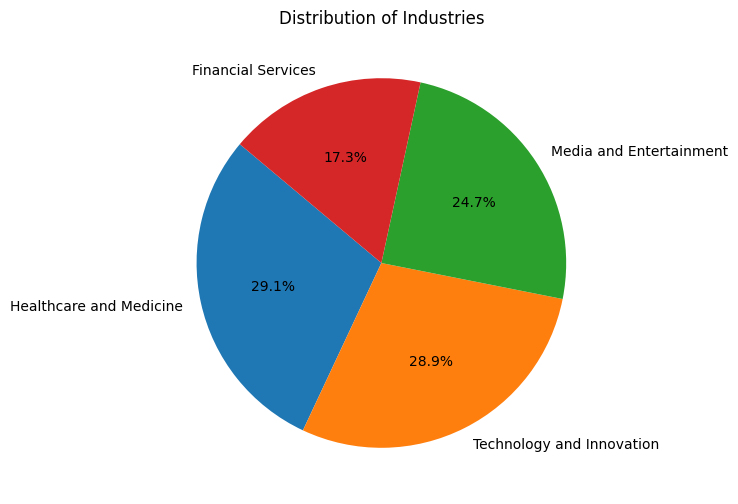

In [7]:
industry_counts = df_topics['industry_categories'].value_counts()
plt.figure(figsize=(8, 6))
industry_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Industries')
plt.ylabel('')  # Hide the y-label
plt.show()

**Job Candidates Pie Chart**

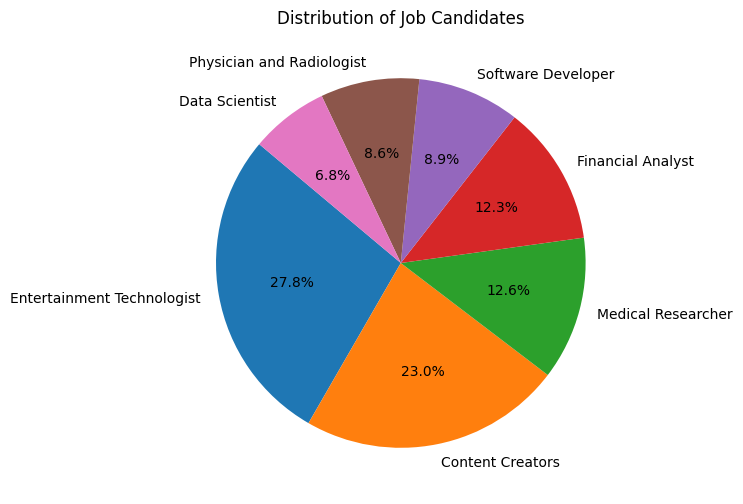

In [8]:
job_candidates_counts = df_topics['job_candidates'].value_counts()
plt.figure(figsize=(8, 6))
job_candidates_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Candidates')
plt.ylabel('')  # Hide the y-label
plt.show()

**Number of Job Candidates in Each Industry Category**

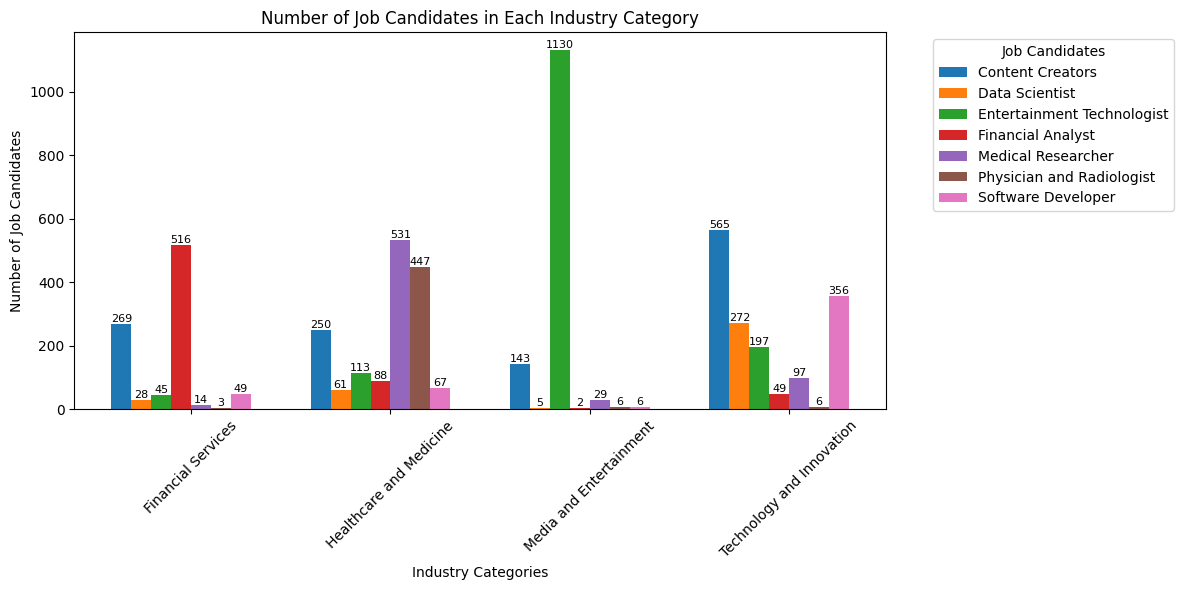

In [15]:
pivot_table = df_topics.pivot_table(index='industry_categories', columns='job_candidates', aggfunc='size', fill_value=0)

# Prepare data for plotting
categories = pivot_table.index.tolist()
job_candidates = pivot_table.columns.tolist()
data = pivot_table.values.T  # Transpose to get data in the right shape for plotting

# Number of categories
n_categories = len(categories)
# Number of job candidates
n_job_candidates = len(job_candidates)

# The x locations for the groups
ind = np.arange(n_categories)  
# The width of the bars
width = 0.1  

plt.figure(figsize=(12, 6))

for i in range(n_job_candidates):
    bars = plt.bar(ind + i*width, data[i], width, label=job_candidates[i])
    # Add the text for the number of job candidates on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

plt.xlabel('Industry Categories')
plt.ylabel('Number of Job Candidates')
plt.title('Number of Job Candidates in Each Industry Category')
plt.xticks(ind + width * n_job_candidates / 2, categories, rotation=45)
plt.legend(title='Job Candidates', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Sentiment Score Changing over Time for each Industry**

**(a)** **Industry Probability Negative**

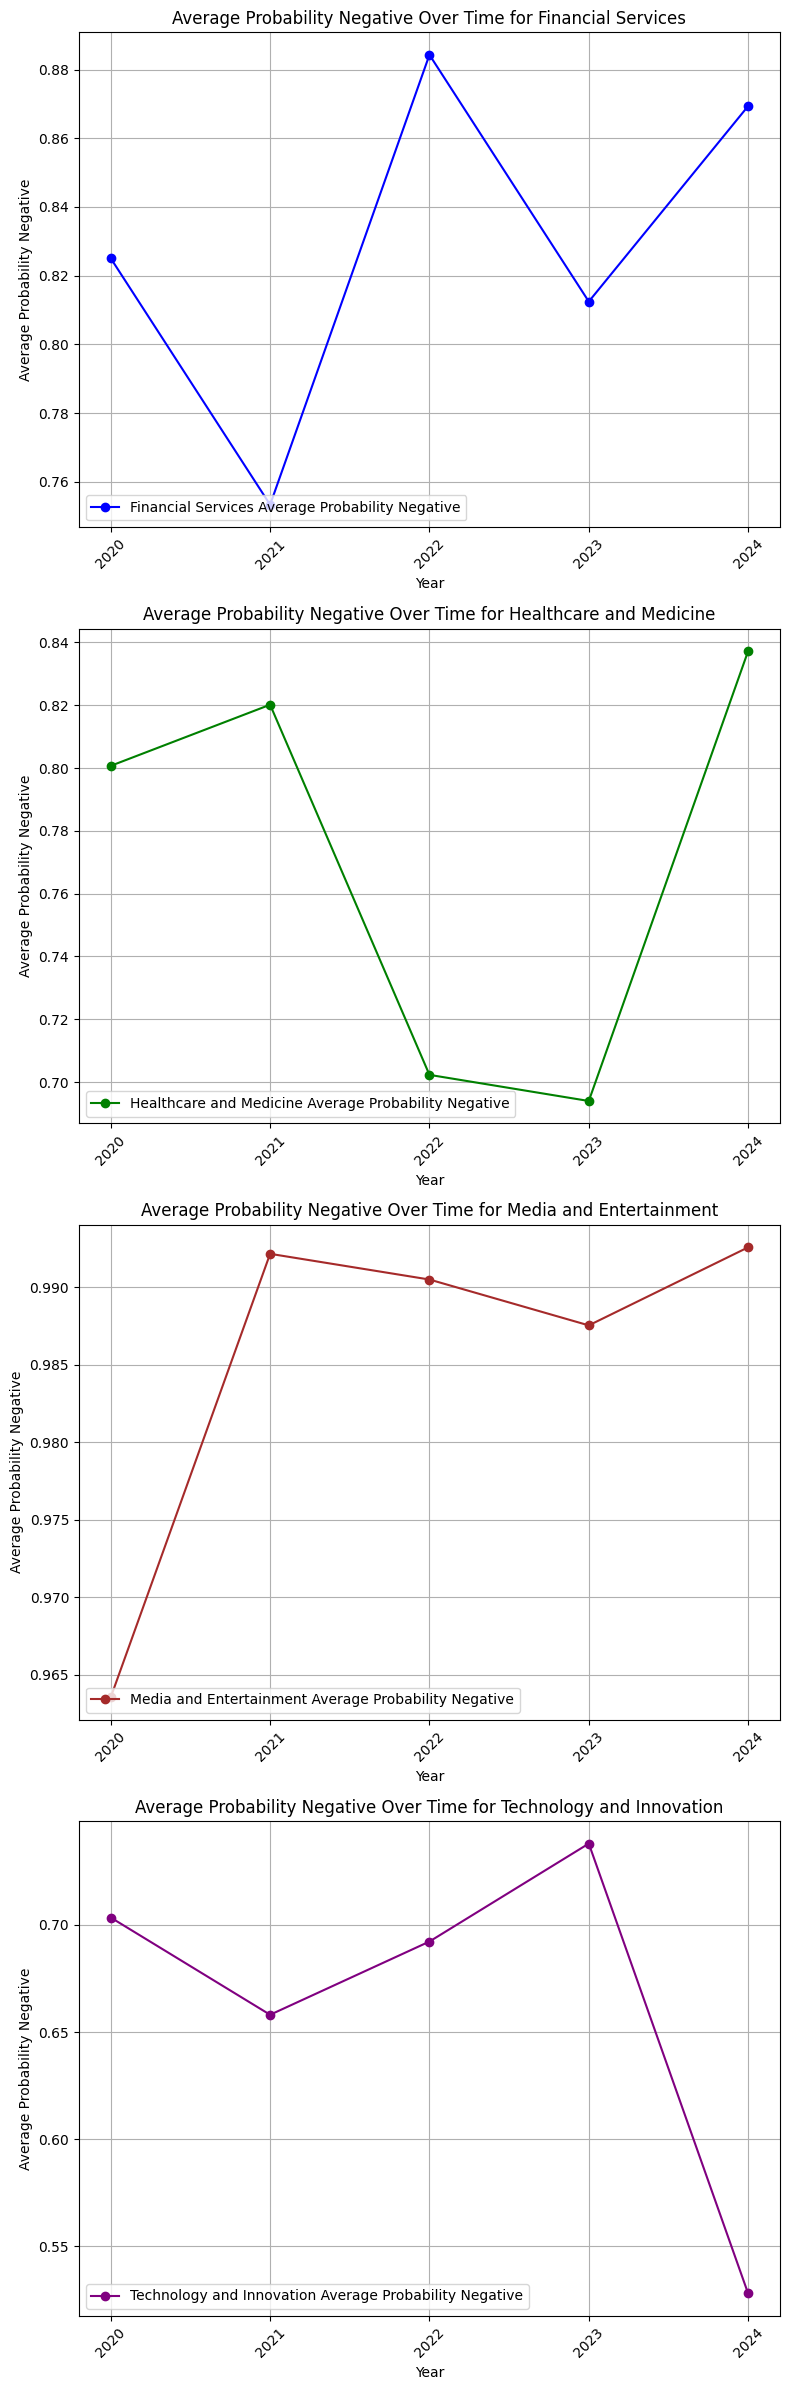

In [93]:
# First, convert 'date' to datetime and extract the year
df_topics['date'] = pd.to_datetime(df_topics['date'])
df_topics['year'] = df_topics['date'].dt.year

# Group by 'year' and 'industry_categories', then calculate the mean of 'Probability Negative'
grouped_df = df_topics.groupby(['year', 'industry_categories'])['Probability Negative'].mean().reset_index()

# Get unique industry categories
industry_cat = grouped_df['industry_categories'].unique()

# Define the years you want to include on the x-axis
years = [2020, 2021, 2022, 2023, 2024]

# Determine the number of subplots needed (one for each industry categories)
n_subplots = len(industry_cat)

# Create subplots with sharex=False
fig, axs = plt.subplots(n_subplots, 1, figsize=(8, 6*n_subplots), sharex=False)

# Define specific colors as requested
colors = ["Blue", "Green", "Brown", "Purple"]

# Loop through each industry categories and plot their average 'Probability Negative' over time
for i, industry in enumerate(industry_cat):
    subset = grouped_df[grouped_df['industry_categories'] == industry]
    axs[i].plot(subset['year'], subset['Probability Negative'], marker='o', linestyle='-', color=colors[i], label=f'{industry} Average Probability Negative')
    axs[i].set_title(f'Average Probability Negative Over Time for {industry}')
    axs[i].set_ylabel('Average Probability Negative')
    axs[i].set_xlabel('Year')  # Set x-axis label for each subplot
    axs[i].legend(loc='lower left')  # Position the legend at the bottom left corner
    axs[i].grid(True)
    # Set x-axis ticks to the specified years
    axs[i].set_xticks(years)
    axs[i].set_xticklabels(years, rotation=45)  # Rotate labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

**(b)** **Industry Probability Positive**

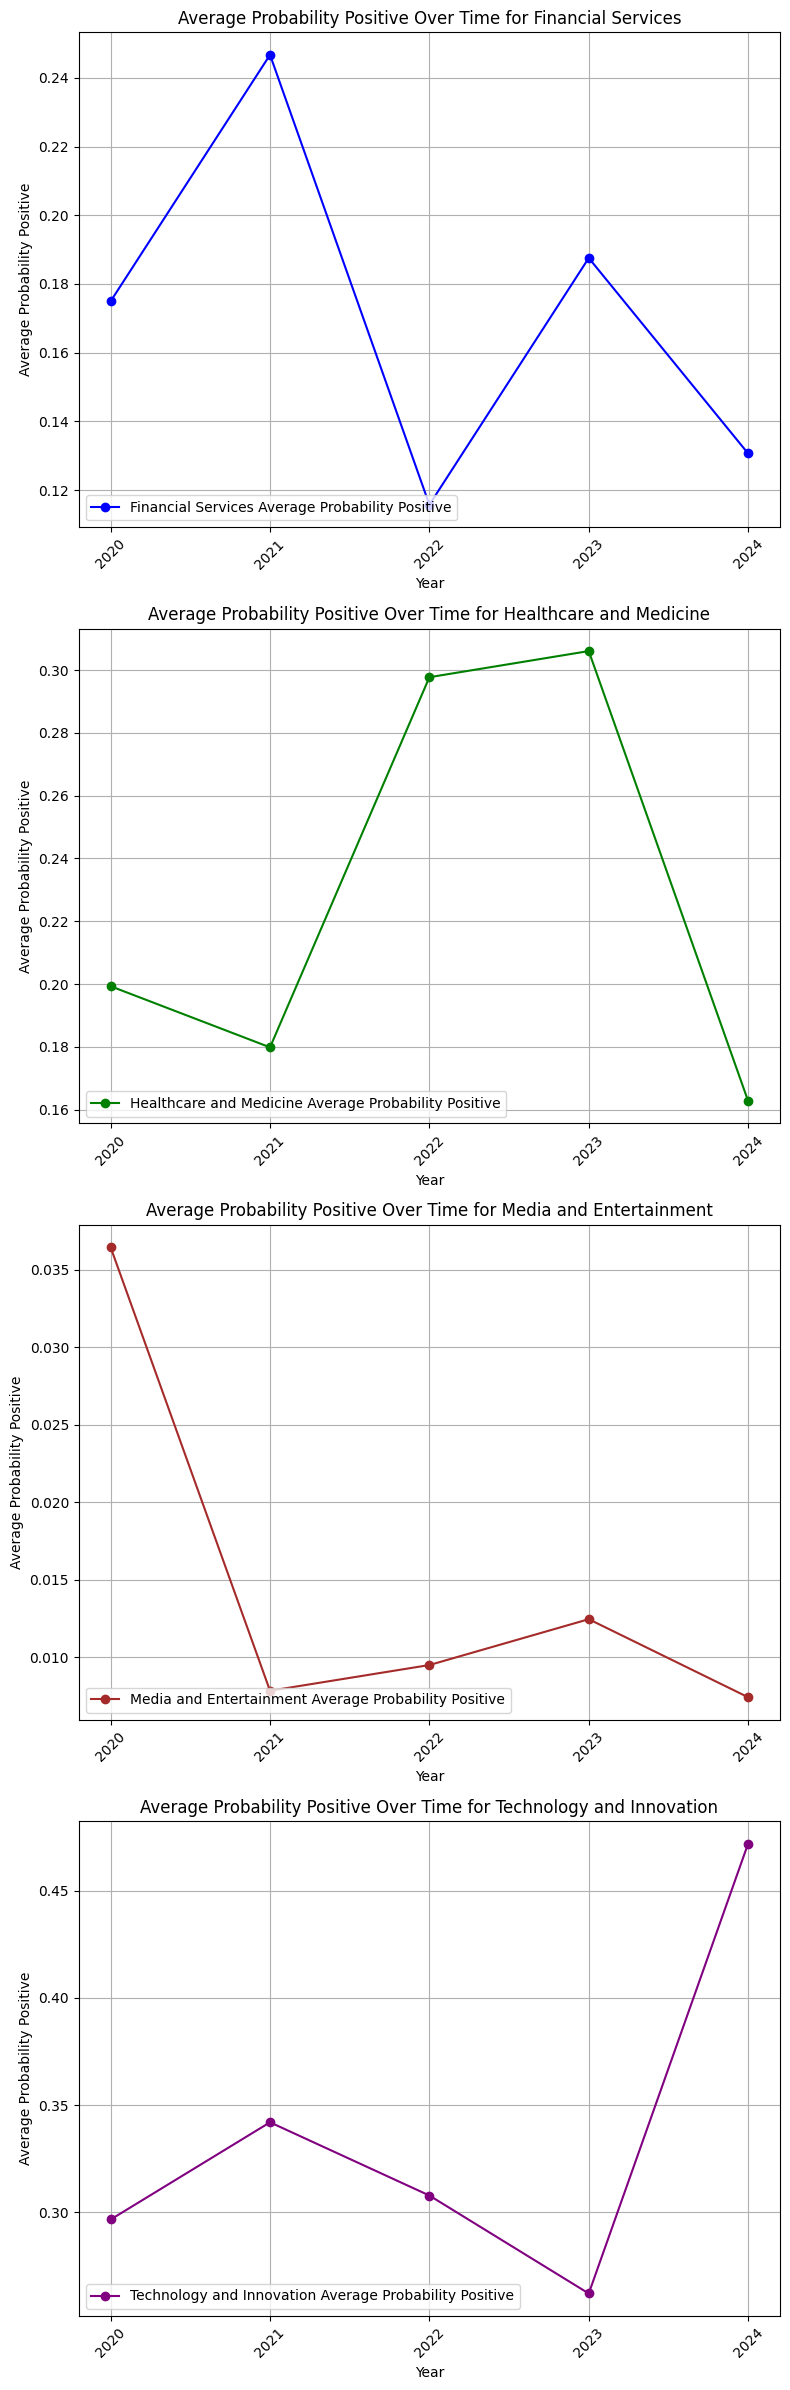

In [94]:
# First, convert 'date' to datetime and extract the year
df_topics['date'] = pd.to_datetime(df_topics['date'])
df_topics['year'] = df_topics['date'].dt.year

# Group by 'year' and 'industry_categories', then calculate the mean of 'Probability Negative'
grouped_df = df_topics.groupby(['year', 'industry_categories'])['Probability Positive'].mean().reset_index()

# Get unique industry categories
industry_cat = grouped_df['industry_categories'].unique()

# Define the years you want to include on the x-axis
years = [2020, 2021, 2022, 2023, 2024]

# Determine the number of subplots needed (one for each industry categories)
n_subplots = len(industry_cat)

# Create subplots with sharex=False
fig, axs = plt.subplots(n_subplots, 1, figsize=(8, 6*n_subplots), sharex=False)

# Define specific colors as requested
colors = ["Blue", "Green", "Brown", "Purple"]

# Loop through each industry categories and plot their average 'Probability Negative' over time
for i, industry in enumerate(industry_cat):
    subset = grouped_df[grouped_df['industry_categories'] == industry]
    axs[i].plot(subset['year'], subset['Probability Positive'], marker='o', linestyle='-', color=colors[i], label=f'{industry} Average Probability Positive')
    axs[i].set_title(f'Average Probability Positive Over Time for {industry}')
    axs[i].set_ylabel('Average Probability Positive')
    axs[i].set_xlabel('Year')  # Set x-axis label for each subplot
    axs[i].legend(loc='lower left')  # Position the legend at the bottom left corner
    axs[i].grid(True)
    # Set x-axis ticks to the specified years
    axs[i].set_xticks(years)
    axs[i].set_xticklabels(years, rotation=45)  # Rotate labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

**(c)** **Industry Probability Positive + Probability Negative**

In [95]:
df_topics['date'] = pd.to_datetime(df_topics['date'])
df_topics['year'] = df_topics['date'].dt.year

# Group by 'year' and 'industry categories', then calculate the mean of 'Probability Negative' and 'Probability Positive'
grouped_df = df_topics.groupby(['year', 'industry_categories']).agg({'Probability Negative': 'mean', 'Probability Positive': 'mean'}).reset_index()

# Get unique industry categories
ind_candidates = grouped_df['industry_categories'].unique()

# Determine the number of subplots needed (one for each industry categories)
n_subplots = len(ind_candidates)

# Create subplots
fig, axs = plt.subplots(n_subplots, 1, figsize=(8, 6*n_subplots), sharex=False)

# Ensure axs is an array when there's only one subplot
if n_subplots == 1:
    axs = [axs]

# Generate a colormap and select colors from it for positive and negative probabilities
colormap = plt.cm.nipy_spectral
colors_positive = [colormap(i) for i in np.linspace(0, 0.5, n_subplots)]
colors_negative = [colormap(i) for i in np.linspace(0.5, 1, n_subplots)]

# Define the years you want to include on the x-axis
years = [2020, 2021, 2022, 2023, 2024]

# Loop through each industry categories and plot their sentiment score over time with different colors
for i, industry in enumerate(ind_candidates):
    subset = grouped_df[grouped_df['industry_categories'] == industry]
    
    # Plot Probability Positive and Probability Negative for each industry categories with different colors
    axs[i].plot(subset['year'], subset['Probability Positive'], marker='o', linestyle='-', label=f'{industry} Positive', color=colors_positive[i])
    axs[i].plot(subset['year'], subset['Probability Negative'], marker='x', linestyle='--', label=f'{industry} Negative', color=colors_negative[i])
    
    axs[i].set_title(f'Sentiment Score Over Time for {industry}')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Average Sentiment Score')
    axs[i].legend()
    axs[i].grid(True)
    
    # Set x-axis ticks to the specified years
    axs[i].set_xticks(years)
    axs[i].set_xticklabels(years)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

**Sentiment Score Changing over Time for each Job**

**(a)** **Job Probability Negative**

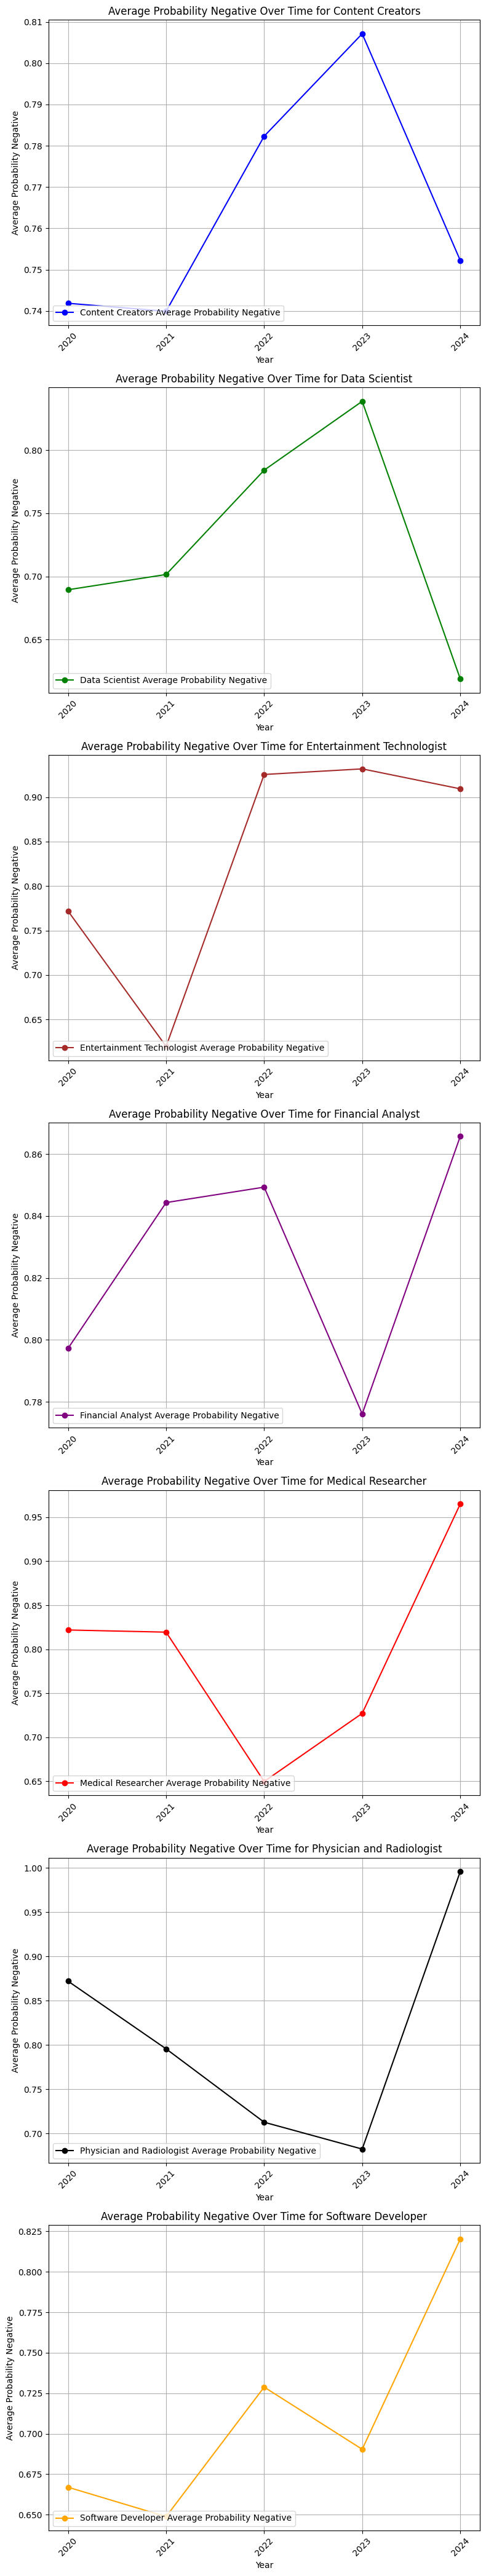

In [96]:
# First, convert 'date' to datetime and extract the year
df_topics['date'] = pd.to_datetime(df_topics['date'])
df_topics['year'] = df_topics['date'].dt.year

# Group by 'year' and 'Job Candidates', then calculate the mean of 'Probability Negative'
grouped_df = df_topics.groupby(['year', 'job_candidates'])['Probability Negative'].mean().reset_index()

# Get unique job candidates
job_cat = grouped_df['job_candidates'].unique()

# Define the years you want to include on the x-axis
years = [2020, 2021, 2022, 2023, 2024]

# Determine the number of subplots needed (one for each job candidate)
n_subplots = len(job_cat)

# Create subplots with sharex=False
fig, axs = plt.subplots(n_subplots, 1, figsize=(8, 6*n_subplots), sharex=False)

# Define specific colors as requested
colors = ["Blue", "Green", "Brown", "Purple", "Red", "Black", "Orange"]

# Loop through each job candidates and plot their average 'Probability Negative' over time
for i, job in enumerate(job_cat):
    subset = grouped_df[grouped_df['job_candidates'] == job]
    axs[i].plot(subset['year'], subset['Probability Negative'], marker='o', linestyle='-', color=colors[i], label=f'{job} Average Probability Negative')
    axs[i].set_title(f'Average Probability Negative Over Time for {job}')
    axs[i].set_ylabel('Average Probability Negative')
    axs[i].set_xlabel('Year')  # Set x-axis label for each subplot
    axs[i].legend(loc='lower left')  # Position the legend at the bottom left corner
    axs[i].grid(True)
    # Set x-axis ticks to the specified years
    axs[i].set_xticks(years)
    axs[i].set_xticklabels(years, rotation=45)  # Rotate labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

**(b)** **Job Probability Positive**

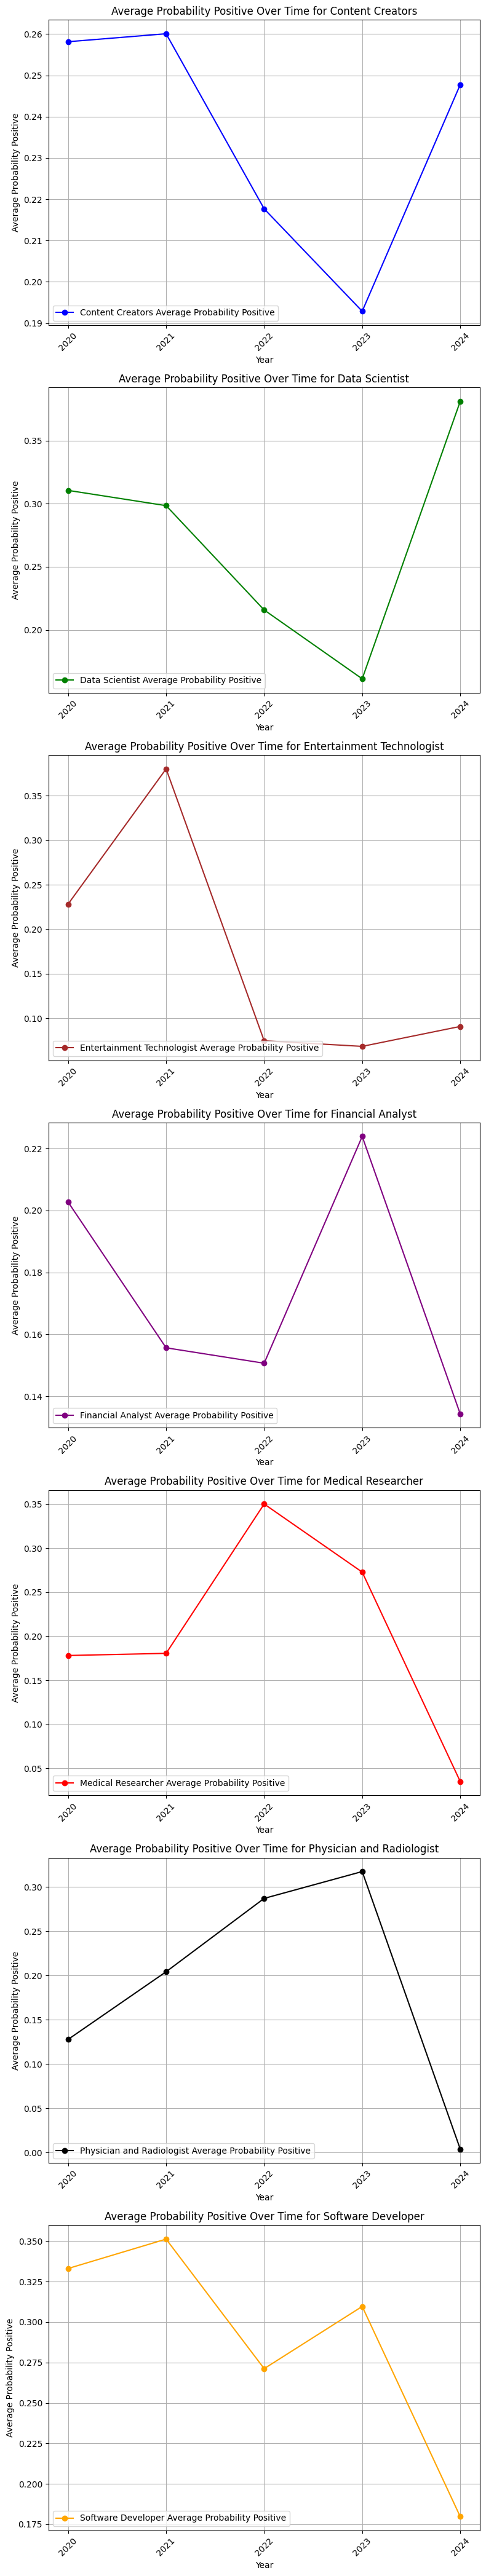

In [97]:
# First, convert 'date' to datetime and extract the year
df_topics['date'] = pd.to_datetime(df_topics['date'])
df_topics['year'] = df_topics['date'].dt.year

# Group by 'year' and 'Job Candidates', then calculate the mean of 'Probability Positive'
grouped_df = df_topics.groupby(['year', 'job_candidates'])['Probability Positive'].mean().reset_index()

# Get unique job candidates
job_cat = grouped_df['job_candidates'].unique()

# Define the years you want to include on the x-axis
years = [2020, 2021, 2022, 2023, 2024]

# Determine the number of subplots needed (one for each job candidate)
n_subplots = len(job_cat)

# Create subplots with sharex=False
fig, axs = plt.subplots(n_subplots, 1, figsize=(8, 6*n_subplots), sharex=False)

# Define specific colors as requested
colors = ["Blue", "Green", "Brown", "Purple", "Red", "Black", "Orange"]

# Loop through each job candidates and plot their average 'Probability Negative' over time
for i, job in enumerate(job_cat):
    subset = grouped_df[grouped_df['job_candidates'] == job]
    axs[i].plot(subset['year'], subset['Probability Positive'], marker='o', linestyle='-', color=colors[i], label=f'{job} Average Probability Positive')
    axs[i].set_title(f'Average Probability Positive Over Time for {job}')
    axs[i].set_ylabel('Average Probability Positive')
    axs[i].set_xlabel('Year')  # Set x-axis label for each subplot
    axs[i].legend(loc='lower left')  # Position the legend at the bottom left corner
    axs[i].grid(True)
    # Set x-axis ticks to the specified years
    axs[i].set_xticks(years)
    axs[i].set_xticklabels(years, rotation=45)  # Rotate labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

**(c)** **Job Probability Positive + Probability Negative**

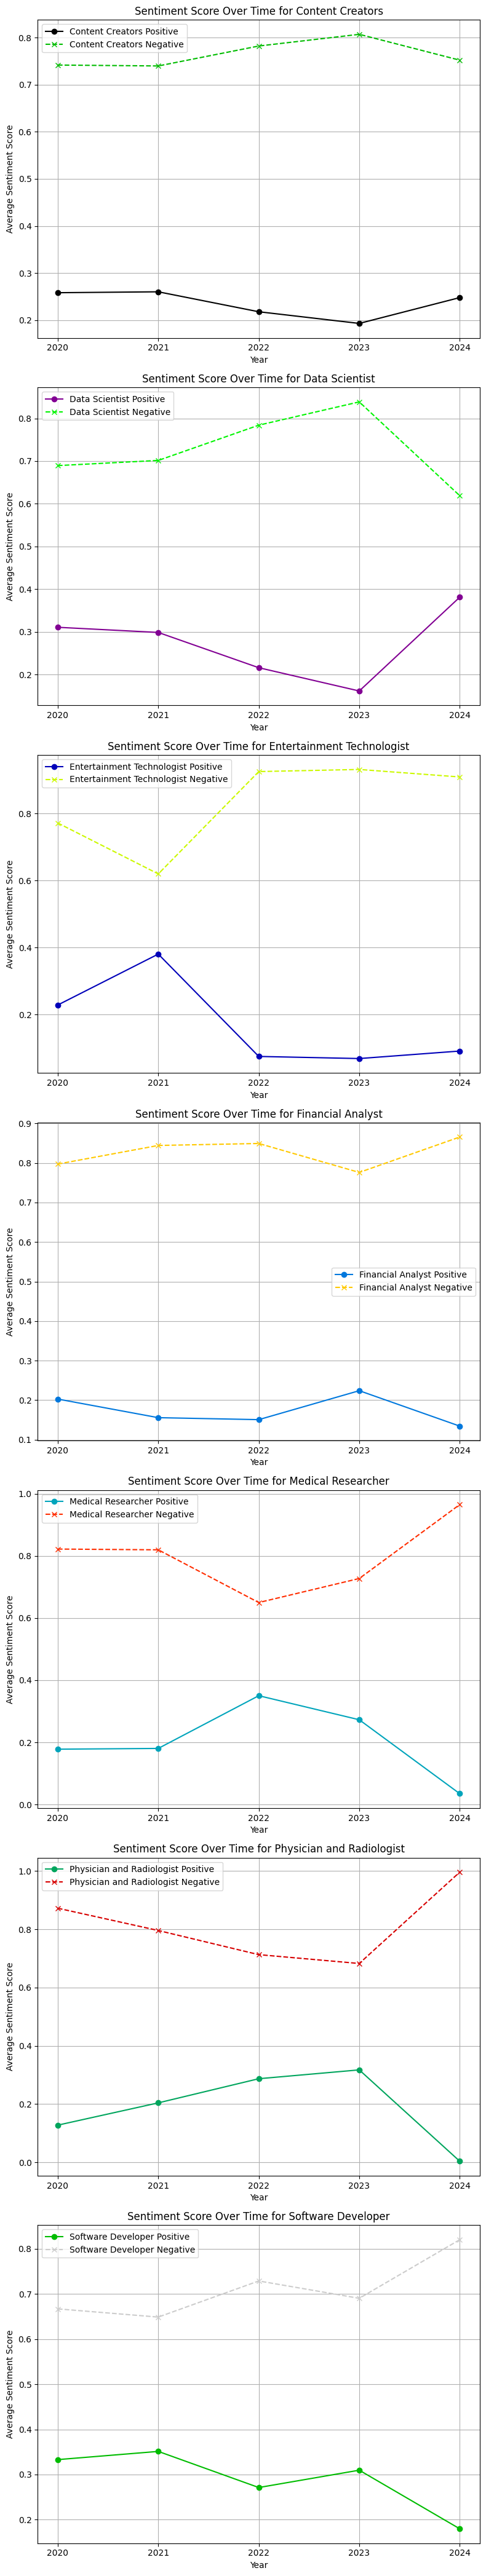

In [100]:
df_topics['date'] = pd.to_datetime(df_topics['date'])
df_topics['year'] = df_topics['date'].dt.year

# Group by 'year' and 'job candidates', then calculate the mean of 'Probability Negative' and 'Probability Positive'
grouped_df = df_topics.groupby(['year', 'job_candidates']).agg({'Probability Negative': 'mean', 'Probability Positive': 'mean'}).reset_index()

# Get unique industry categories
job_candidates = grouped_df['job_candidates'].unique()

# Determine the number of subplots needed (one for each industry categories)
n_subplots = len(job_candidates)

# Create subplots
fig, axs = plt.subplots(n_subplots, 1, figsize=(8, 6*n_subplots), sharex=False)

# Ensure axs is an array when there's only one subplot
if n_subplots == 1:
    axs = [axs]

# Generate a colormap and select colors from it for positive and negative probabilities
colormap = plt.cm.nipy_spectral
colors_positive = [colormap(i) for i in np.linspace(0, 0.5, n_subplots)]
colors_negative = [colormap(i) for i in np.linspace(0.5, 1, n_subplots)]

# Define the years you want to include on the x-axis
years = [2020, 2021, 2022, 2023, 2024]

# Loop through each job candidate and plot their sentiment score over time with different colors
for i, job in enumerate(job_candidates):
    subset = grouped_df[grouped_df['job_candidates'] == job]
    
    # Plot Probability Positive and Probability Negative for each job candidate with different colors
    axs[i].plot(subset['year'], subset['Probability Positive'], marker='o', linestyle='-', label=f'{job} Positive', color=colors_positive[i])
    axs[i].plot(subset['year'], subset['Probability Negative'], marker='x', linestyle='--', label=f'{job} Negative', color=colors_negative[i])
    
    axs[i].set_title(f'Sentiment Score Over Time for {job}')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Average Sentiment Score')
    axs[i].legend()
    axs[i].grid(True)
    
    # Set x-axis ticks to the specified years
    axs[i].set_xticks(years)
    axs[i].set_xticklabels(years)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

#### 3.1.2 Plot a timeline to illustrate how the sentiment is changing over time

In [98]:
df_topics['date'] = pd.to_datetime(df_topics['date'])
df_topics['year'] = df_topics['date'].dt.year

# Group by 'year' only, then calculate the mean of 'Probability Negative' and 'Probability Positive'
grouped_df = df_topics.groupby('year').agg({'Probability Negative': 'mean', 'Probability Positive': 'mean'}).reset_index()

# Define the years you want to include on the x-axis
years = [2020, 2021, 2022, 2023, 2024]

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Probability Positive and Probability Negative for the aggregated data
ax.plot(grouped_df['year'], grouped_df['Probability Positive'], marker='o', linestyle='-', label='Average Probability Positive', color='green')
ax.plot(grouped_df['year'], grouped_df['Probability Negative'], marker='x', linestyle='--', label='Average Probability Negative', color='red')

ax.set_title('Average Sentiment Score Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sentiment Score')
ax.legend()
ax.grid(True)

# Set x-axis ticks to the specified years
ax.set_xticks(years)
ax.set_xticklabels(years)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

### 3.2 Identify new technologies and AI solutions that might be affecting the employment landscape

**(a)** Plot a timeline to illustrate the introduction of some of these technologies

In [101]:
df_ai_tech = df_topics.copy()

In [102]:
df_ai_tech.head()

date                                              title  \
1  2020-02-27  Children With Autism Saw Their Learning and So...   
65 2020-03-26  Global Artificial Intelligence in Robotics Mar...   
67 2023-11-01  The biggest winners — and losers — in the comi...   
72 2023-12-11  US Is Looking Into Nvidia’s AI Chips for China...   
77 2023-06-05  Newly Developed Humanoid Robot Warns About AI ...   

                                      text_lemmatized  \
1   [child, autism, see, learn, skill, boost, play...   
65  [intelligence, robotic, marketgrowth, trend, f...   
67  [big, winner, loser, come, ai, job, apocalypse...   
72  [look, ai, chip, raimondo, say, home, mail, ne...   
77  [newly, develop, humanoid, robot, warn, ai, cr...   

                                  text_lemmatized_str  \
1   child autism see learn skill boost play ai rob...   
65  intelligence robotic marketgrowth trend foreca...   
67  big winner loser come ai job apocalypse home m...   
72  look ai chip raimondo say home mail news finan...   
77  newly develop humanoid robot warn ai create op...   

          industry_categories  \
1   Technology and Innovation   
65  Technology and Innovation   
67         Financial Services   
72         Financial Services   
77  Technology and Innovation   

                                       summarize_text Sentiment  \
1   child autism see learn skill boost play ai rob...  Negative   
65  intelligence robotic marketgrowth trend foreca...  Negative   
67  big winner loser come ai job apocalypse home m...  Negative   
72  look ai chip raimondo say home mail news finan...  Negative   
77  newly develop humanoid robot warn ai create op...  Negative   

    Probability Negative  Probability Positive              job_candidates  \
1                  0.988                 0.012  Entertainment Technologist   
65                 0.833                 0.167            Content Creators   
67                 0.793                 0.207           Financial Analyst   
72                 0.863                 0.137           Financial Analyst   
77                 0.739                 0.261            Content Creators   

    year  
1   2020  
65  2020  
67  2023  
72  2023  
77  2023

In [103]:
# List of AI technology keywords
ai_tech_keywords = ['automate', 'generative ai', 'conversational ai', 'image generation', 
                    'llm', 'large language models', 'openai', 'chatgpt', 'gpt', 'bard', 
                    'google bard', 'llama', 'chatbot', 'cognitive computing', 'intelligence ai', 
                    'reinforcement learning', 'computer vision', 'text generation', 'pretrained models']

# Join the keywords into a single regex pattern with the '|' operator
regex_pattern = '|'.join(ai_tech_keywords)

# Use the .str.contains method to search for the regex pattern in the 'text_lemmatized_str' column
# Set case=False for case-insensitive search and na=False to treat missing values as False
df_ai_tech['ai_tech'] = df_ai_tech['text_lemmatized_str'].str.contains(regex_pattern, case=False, na=False, regex=True)

In [104]:
df_ai_tech.head()

date                                              title  \
1  2020-02-27  Children With Autism Saw Their Learning and So...   
65 2020-03-26  Global Artificial Intelligence in Robotics Mar...   
67 2023-11-01  The biggest winners — and losers — in the comi...   
72 2023-12-11  US Is Looking Into Nvidia’s AI Chips for China...   
77 2023-06-05  Newly Developed Humanoid Robot Warns About AI ...   

                                      text_lemmatized  \
1   [child, autism, see, learn, skill, boost, play...   
65  [intelligence, robotic, marketgrowth, trend, f...   
67  [big, winner, loser, come, ai, job, apocalypse...   
72  [look, ai, chip, raimondo, say, home, mail, ne...   
77  [newly, develop, humanoid, robot, warn, ai, cr...   

                                  text_lemmatized_str  \
1   child autism see learn skill boost play ai rob...   
65  intelligence robotic marketgrowth trend foreca...   
67  big winner loser come ai job apocalypse home m...   
72  look ai chip raimondo say home mail news finan...   
77  newly develop humanoid robot warn ai create op...   

          industry_categories  \
1   Technology and Innovation   
65  Technology and Innovation   
67         Financial Services   
72         Financial Services   
77  Technology and Innovation   

                                       summarize_text Sentiment  \
1   child autism see learn skill boost play ai rob...  Negative   
65  intelligence robotic marketgrowth trend foreca...  Negative   
67  big winner loser come ai job apocalypse home m...  Negative   
72  look ai chip raimondo say home mail news finan...  Negative   
77  newly develop humanoid robot warn ai create op...  Negative   

    Probability Negative  Probability Positive              job_candidates  \
1                  0.988                 0.012  Entertainment Technologist   
65                 0.833                 0.167            Content Creators   
67                 0.793                 0.207           Financial Analyst   
72                 0.863                 0.137           Financial Analyst   
77                 0.739                 0.261            Content Creators   

    year  ai_tech  
1   2020    False  
65  2020     True  
67  2023     True  
72  2023     True  
77  2023     True

**Save the AI Tech Data**

In [105]:
# df_ai_tech.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/ai_tech_data.parquet")

In [5]:
# df_ai_tech = pd.read_parquet("gs://wisdom-final-nlp-final/NLP_Project/ai_tech_data.parquet", engine='pyarrow')

In [6]:
df_ai = df_ai_tech[df_ai_tech['ai_tech'] == True]

In [7]:
df_ai[['title', 'text_lemmatized_str']].sample(10, random_state = 10)

title  \
152233  Fraction Rides ChatGPT Wave and Hits $2 Millio...   
45582   Ibex and Medipath Sign Multi-Year, Multi-Site ...   
67375   Media.Monks Launches AI Solution Monks.Flow at...   
56168   MEDSIR and I3LUNG Partners Meet to Advance the...   
142769  New AI developed at OSF HealthCare to help tho...   
162700  SoftwareReviews Identifies he Top-Rated Cloud ...   
88615   A computer engineering student is using ChatGP...   
28608   How artificial intelligence can enable rapid C...   
148752  Fractal announces fundraise and spin-out of Th...   
91852   Paradox Highlighted Among Early Adopters of Wo...   

                                      text_lemmatized_str  
152233  fraction ride chatgpt wave hit resource blog j...  
45582   ibex sign multiyear expansion ai cancer diagno...  
67375   mediamonk launch ai solution monksflow resourc...  
56168   partner meet advance application ai lung cance...  
142769  new ai develop osf cancer patient give backsil...  
162700  softwarereview identify rate platform fuel ai ...  
88615   computer engineering student use chatgpt overc...  
28608   intelligence enable rapid covid lung analysis ...  
148752  fractal announce fundraise spinout thereminai ...  
91852   highlight early adopter workday ai marketplace...

In [108]:
df_ai.head()

date                                              title  \
65 2020-03-26  Global Artificial Intelligence in Robotics Mar...   
67 2023-11-01  The biggest winners — and losers — in the comi...   
72 2023-12-11  US Is Looking Into Nvidia’s AI Chips for China...   
77 2023-06-05  Newly Developed Humanoid Robot Warns About AI ...   
82 2021-08-27  How to Improve Model Quality in Machine Learni...   

                                      text_lemmatized  \
65  [intelligence, robotic, marketgrowth, trend, f...   
67  [big, winner, loser, come, ai, job, apocalypse...   
72  [look, ai, chip, raimondo, say, home, mail, ne...   
77  [newly, develop, humanoid, robot, warn, ai, cr...   
82  [improve, model, quality, machine, learn, hack...   

                                  text_lemmatized_str  \
65  intelligence robotic marketgrowth trend foreca...   
67  big winner loser come ai job apocalypse home m...   
72  look ai chip raimondo say home mail news finan...   
77  newly develop humanoid robot warn ai create op...   
82  improve model quality machine learn hacker noo...   

          industry_categories  \
65  Technology and Innovation   
67         Financial Services   
72         Financial Services   
77  Technology and Innovation   
82  Technology and Innovation   

                                       summarize_text Sentiment  \
65  intelligence robotic marketgrowth trend foreca...  Negative   
67  big winner loser come ai job apocalypse home m...  Negative   
72  look ai chip raimondo say home mail news finan...  Negative   
77  newly develop humanoid robot warn ai create op...  Negative   
82  improve model quality machine learn hacker noo...  Negative   

    Probability Negative  Probability Positive      job_candidates  year  \
65                 0.833                 0.167    Content Creators  2020   
67                 0.793                 0.207   Financial Analyst  2023   
72                 0.863                 0.137   Financial Analyst  2023   
77                 0.739                 0.261    Content Creators  2023   
82                 0.869                 0.131  Software Developer  2021   

    ai_tech  
65     True  
67     True  
72     True  
77     True  
82     True

In [47]:
df_text_gen = df_ai[df_ai.text_lemmatized_str.str.contains('text generation')].reset_index(drop = True)
df_bard = df_ai[df_ai.text_lemmatized_str.str.contains('google bard')].reset_index(drop = True)

# Extract year from 'date' for both DataFrames
df_text_gen['year'] = pd.to_datetime(df_text_gen['date']).dt.year
df_bard['year'] = pd.to_datetime(df_bard['date']).dt.year

# Group by year and calculate mean of 'Probability Positive' and 'Probability Negative'
df_text_gen_yearly = df_text_gen.groupby('year').agg({'Probability Positive': 'mean', 'Probability Negative': 'mean'}).reset_index()
df_bard_yearly = df_bard.groupby('year').agg({'Probability Positive': 'mean', 'Probability Negative': 'mean'}).reset_index()

# Set the size for all figures
plt.rcParams["figure.figsize"] = (20, 6)

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2)

# Define specific colors for positive and negative probabilities
positive_color = 'brown'
negative_color = 'blue'

# Loop through each aggregated DataFrame and plot their overall probability positive and probability negative over time
for df, ax, title in zip([df_text_gen_yearly, df_bard_yearly], axs, ['Text Generation', 'Google Bard']):
    
    # Plot Probability Positive and Probability Negative
    ax.plot(df['year'], df['Probability Positive'], marker='o', linestyle='-', color=positive_color, label='Probability Positive')
    ax.plot(df['year'], df['Probability Negative'], marker='x', linestyle='-', color=negative_color, label='Probability Negative')
    
    # Create custom legend handles
    legend_handles = [
        Line2D([0], [0], color=positive_color, lw=2, label='Probability Positive'),
        Line2D([0], [0], color=negative_color, lw=2, label='Probability Negative')
    ]
    
    # Add the legend to the subplot
    ax.legend(handles=legend_handles)
    
    # Set title, labels, and other parameters
    ax.set_title(f'Average Sentiment for {title} Articles by Year', fontsize=20)
    ax.set_xlabel('Year', fontsize=20)
    ax.set_ylabel('Average Probability', fontsize=20)
    
    # Rotate x-axis labels by 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # This line is added to rotate the labels
    
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.grid(True)

# Adjust the layout so that titles and labels do not overlap
plt.tight_layout()

# Display the plots
plt.show()

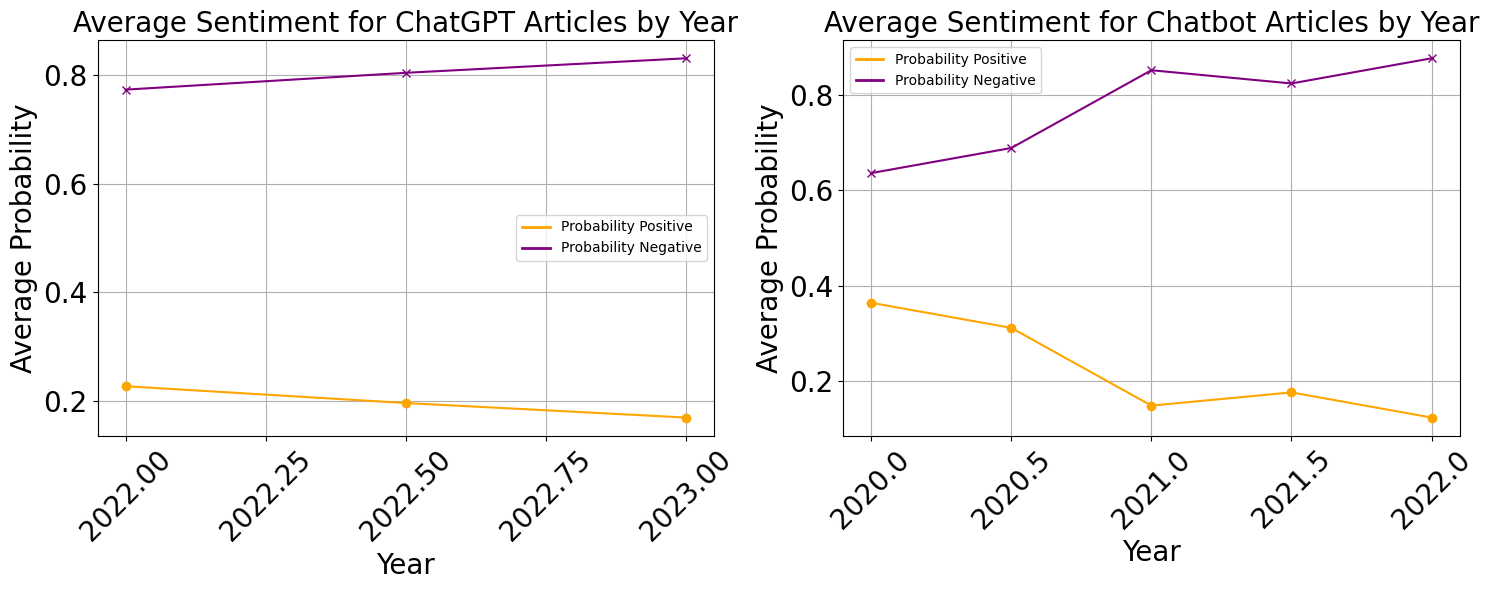

In [48]:
df_chatgpt = df_ai[df_ai.text_lemmatized_str.str.contains('chatgpt')].reset_index(drop = True)
df_chatbot = df_ai[df_ai.text_lemmatized_str.str.contains('chatbot')].reset_index(drop = True)

# Extract year from 'date' for both DataFrames
df_chatgpt['year'] = pd.to_datetime(df_chatgpt['date']).dt.year
df_chatbot['year'] = pd.to_datetime(df_chatbot['date']).dt.year

# Group by year and calculate mean of 'Probability Positive' and 'Probability Negative'
df_chatgpt_yearly = df_chatgpt.groupby('year').agg({'Probability Positive': 'mean', 'Probability Negative': 'mean'}).reset_index()
df_chatbot_yearly = df_chatbot.groupby('year').agg({'Probability Positive': 'mean', 'Probability Negative': 'mean'}).reset_index()

# Set the size for all figures
plt.rcParams["figure.figsize"] = (15, 6)

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2)

# Define specific colors for positive and negative probabilities
positive_color = 'orange'
negative_color = 'purple'

# Loop through each aggregated DataFrame and plot their overall probability positive and probability negative over time
for df, ax, title in zip([df_chatgpt_yearly, df_chatbot_yearly], axs, ['ChatGPT', 'Chatbot']):
    
    # Plot Probability Positive and Probability Negative
    ax.plot(df['year'], df['Probability Positive'], marker='o', linestyle='-', color=positive_color, label='Probability Positive')
    ax.plot(df['year'], df['Probability Negative'], marker='x', linestyle='-', color=negative_color, label='Probability Negative')
    
    # Create custom legend handles
    legend_handles = [
        Line2D([0], [0], color=positive_color, lw=2, label='Probability Positive'),
        Line2D([0], [0], color=negative_color, lw=2, label='Probability Negative')
    ]
    
    # Add the legend to the subplot
    ax.legend(handles=legend_handles)
    
    # Set title, labels, and other parameters
    ax.set_title(f'Average Sentiment for {title} Articles by Year', fontsize=20)
    ax.set_xlabel('Year', fontsize=20)
    ax.set_ylabel('Average Probability', fontsize=20)
    
    # Rotate x-axis labels by 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # This line is added to rotate the labels
    
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.grid(True)

# Adjust the layout so that titles and labels do not overlap
plt.tight_layout()

# Display the plots
plt.show()

## 4. NER Analysis

In [21]:
df_ner = pd.read_parquet("gs://wisdom-final-nlp-final/NLP_Project/ner_data_final.parquet", engine='pyarrow')
df_ner.shape

(167830, 11)

In [22]:
df_ner = df_ner.rename(columns={'text_cleaned_ner_x': 'text_cleaned_ner'})

In [23]:
df_ner_final = df_ner[['date', 'title', 'title_cleaned_ner', 'title_tokens_ner', 'text_cleaned_ner', 'text_tokens_ner']]

In [13]:
relevant_keywords = ['ai', 'artificial intelligence', 'automate', 'productivity', 
                     'generative ai', 'conversational ai', 'image generation', 'machine learning', 'deep learning']

relevant_phrases = ['ai impact', 'job automation', 'ai technology', 'ai application']

relevant_keywords += [keyword.upper() for keyword in relevant_keywords]  # Uppercase
relevant_phrases += [keyword.title() for keyword in relevant_phrases]  # Title case

# Function to check if an article is relevant based on keywords and phrases
def is_relevant(text):
    for keyword in relevant_keywords:
        if keyword in text:
            return True
    for phrase in relevant_phrases:
        if phrase in text:
            return True
    return False

# Apply the relevance check function to filter the dataframe
df_ner_new = df_ner_final[df_ner_final['text_tokens_ner'].parallel_apply(is_relevant)]

df_ner_new.shape

(154483, 6)

In [15]:
# df_ner_new.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/ner_final_relevant_data.parquet")

**Save the NER Relevant AI Context**

In [ ]:
# nvidia-smi

In [53]:
df_ner = pd.read_parquet("gs://wisdom-final-nlp-final/NLP_Project/ner_final_relevant_data.parquet", engine='pyarrow')
df_ner.head()

date                                              title  \
0  2020-02-26  LegalTech Artificial Intelligence Market 2019 ...   
1  2020-02-27  Children With Autism Saw Their Learning and So...   
2  2021-02-25  MulticoreWare Inc. Becomes CEVA’s Trusted Part...   
3  2022-10-06  Healthcare Artificial Intelligence Market Anal...   
4  2020-04-29  Artificial Intelligence As A Service Market : ...   

                                   title_cleaned_ner  \
0  LegalTech Artificial Intelligence Market 2019 ...   
1  Children With Autism Saw Their Learning Social...   
2  MulticoreWare Inc. Becomes CEVA's Trusted Part...   
3  Healthcare Artificial Intelligence Market Anal...   
4  Artificial Intelligence As A Service Market : ...   

                                    title_tokens_ner  \
0  [LegalTech, Artificial, Intelligence, Market, ...   
1  [Children, With, Autism, Saw, Their, Learning,...   
2  [MulticoreWare, Inc., Becomes, CEVA, 's, Trust...   
3  [Healthcare, Artificial, Intelligence, Market,...   
4  [Artificial, Intelligence, As, A, Service, Mar...   

                                    text_cleaned_ner  \
0  LegalTech Artificial Intelligence Market 2019 ...   
1  Children With Autism Saw Their Learning Social...   
2  MulticoreWare Inc. Becomes CEVA's Trusted Part...   
3  Healthcare Artificial Intelligence Market Anal...   
4  Artificial Intelligence As A Service Market : ...   

                                     text_tokens_ner  
0  [LegalTech, Artificial, Intelligence, Market, ...  
1  [Children, With, Autism, Saw, Their, Learning,...  
2  [MulticoreWare, Inc., Becomes, CEVA, 's, Trust...  
3  [Healthcare, Artificial, Intelligence, Market,...  
4  [Artificial, Intelligence, As, A, Service, Mar...

In [40]:
%%time

def spy_ner_to_df(texts, dates):
    entities = []
    labels = []
    date = []

    for i, doc in tqdm(enumerate(nlp_ner.pipe(texts)), total=len(texts)):
        if doc.ents:
            for ent in doc.ents:
                entities.append(ent.text)
                labels.append(ent.label_)
                date.append(dates[i])
        else:
            entities.append(None)
            labels.append(None)
            date.append(dates[i])

    # Create the dataframe without sentiment columns
    df = pd.DataFrame({
        'date': date,
        'entities': entities,
        'labels': labels
    })

    return df

df_ner.reset_index(drop=True, inplace=True)

title_ner_df = spy_ner_to_df(df_ner['title_cleaned_ner'], df_ner['date'])
text_ner_df = spy_ner_to_df(df_ner['text_cleaned_ner'], df_ner['date'])

title_ner_df['date'] = pd.to_datetime(title_ner_df['date'])
text_ner_df['date'] = pd.to_datetime(text_ner_df['date'])

100%|██████████| 154483/154483 [2:31:05<00:00, 17.04it/s]  


CPU times: user 2h 31min 44s, sys: 4min 11s, total: 2h 35min 55s
Wall time: 2h 35min 38s


**Logistics**

In [22]:
# Initialize a Google Cloud Storage client
storage_client = storage.Client()

# Define your bucket name and blob name
bucket_name = 'wisdom-final-nlp-final'
blob_name = 'NLP_Project/logreg.joblib'

# Get the bucket
bucket = storage_client.bucket(bucket_name)

# Get the blob
blob = bucket.blob(blob_name)

# Download the blob to a temporary local file
local_path = 'logreg.joblib'
blob.download_to_filename(local_path)

# Load the pipeline from the local file
pipe_log = load(local_path)

In [23]:
%%time

pipe_log = load('logreg.joblib')

title_ner_df = title_ner_df.dropna(subset=['entities'])

# 1. Use the pipe_log to predict the sentiment based on summarize_text
y_pred = pipe_log.predict(title_ner_df['entities'])

# 2. Get the probabilities for each class
y_pred_prob = pipe_log.predict_proba(title_ner_df['entities'])

# 3. Add the new columns to the df_topics DataFrame
title_ner_df['Sentiment'] = np.where(y_pred < 1, 'Negative', 'Positive')

# Add the probability columns
# Note: The format method is used to insert the probabilities into the string
title_ner_df['Probability Negative'] = y_pred_prob[:, 0].round(3)
title_ner_df['Probability Positive'] = y_pred_prob[:, 1].round(3)

CPU times: user 38.4 s, sys: 1.51 s, total: 39.9 s
Wall time: 39.9 s


In [26]:
%%time

text_ner_df = text_ner_df.dropna(subset=['entities'])

# 1. Use the pipe_log to predict the sentiment based on summarize_text
y_pred = pipe_log.predict(text_ner_df['entities'])

# 2. Get the probabilities for each class
y_pred_prob = pipe_log.predict_proba(text_ner_df['entities'])

# 3. Add the new columns to the df_topics DataFrame
text_ner_df['Sentiment'] = np.where(y_pred < 1, 'Negative', 'Positive')

# Add the probability columns
# Note: The format method is used to insert the probabilities into the string
text_ner_df['Probability Negative'] = y_pred_prob[:, 0].round(3)
text_ner_df['Probability Positive'] = y_pred_prob[:, 1].round(3)

CPU times: user 3min 1s, sys: 2.16 s, total: 3min 3s
Wall time: 3min 3s


**Save the Original NER Title & Text Data**

In [28]:
# title_ner_df.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/title_ner_org.parquet")

In [29]:
# text_ner_df.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/text_ner_org.parquet")

### 4.1 Extract AI Product

**Title**

In [4]:
title_ner_df = pd.read_parquet("gs://wisdom-final-nlp-final/NLP_Project/title_ner_org.parquet", engine='pyarrow')
title_ner_df.head()

date                           entities labels Sentiment  \
0 2020-02-26                          LegalTech    ORG  Negative   
1 2020-02-26                               2019   DATE  Negative   
2 2020-02-26        Catalyst Repository Systems    ORG  Negative   
3 2020-02-26                          Australis   NORP  Negative   
5 2021-02-25  MulticoreWare Inc. Becomes CEVA's    ORG  Negative   

   Probability Negative  Probability Positive  
0                 0.605                 0.395  
1                 0.654                 0.346  
2                 0.618                 0.382  
3                 0.605                 0.395  
5                 0.574                 0.426

In [10]:
pd.set_option('display.max_rows', None)

In [31]:
# List of AI-related entities to keep
ai_entities = [
    "Google Cloud", "NVIDIA", "Open AI", "Google Bard", "GPT", "Vertex AI Platform",
    "Lensa AI", "Generative AI", "ChatGPT", "FatBrain AI", "MarketScape", "4.0 AI",
    "Shield AI Demonstrates", "Shield AI", "Shield AI Unveils V-BAT Teams", "Shield AI Announces",
    "Shield AI Welcomes Shivon Zilis Board", "OCR AI", "Introduces Copilot - A Proprietary Generative AI",
    "Copilot", "Cockpit Gen AI", "Galaxy AI", "GPT Turbo", "DeepBrain", "Nebula AI",
    "Sway AI Interactor", "Smart Eyewear", "GPU Modules", "Discovery Research",
    "GTC", "Galaxy S24", "ReadWorks Tailor-ED", "Mindtronic", "Google Cloud Accelerate AI Innovation",
    "Generative AI", "Plugin", "Galaxy AI", "Malwarebytes", "Google AI", "AI Launches Explorer",
    "WordPress Plugin", "Diffusion XL 1.0", "PowerPoint", "Atomwise", "S3", "Gemini AI",
    "Tuner(tm", "Nebula AI", "DeepBrain", "Bavard", "Callverso", "SaaS", "Lensa", "GPT Turbo",
    "Magellan"
]

# Filter the dataframe to only include rows with AI-related entities in the 'entities' column
title_ner_df_ai = title_ner_df[
    (title_ner_df['labels'] == 'PRODUCT') & (title_ner_df['entities'].isin(ai_entities))
]

title_ner_df_ai.shape

(1245, 6)

In [32]:
# title_ner_df_ai.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/title_ner_ai.parquet")

**Text**

In [15]:
text_ner_df = pd.read_parquet("gs://wisdom-final-nlp-final/NLP_Project/text_ner_org.parquet", engine='pyarrow')
text_ner_df.head()

date                     entities labels Sentiment  \
0 2020-02-26                    LegalTech    ORG  Negative   
1 2020-02-26                         2019   DATE  Negative   
2 2020-02-26  Catalyst Repository Systems    ORG  Negative   
3 2020-02-26                    Australis   NORP  Negative   
4 2020-02-26  Wednesday, February 26 2020   DATE  Negative   

   Probability Negative  Probability Positive  
0                 0.605                 0.395  
1                 0.654                 0.346  
2                 0.618                 0.382  
3                 0.605                 0.395  
4                 0.716                 0.284

In [125]:
text_ner_df_100pro = text_ner_df[text_ner_df['labels'] == 'PRODUCT'].groupby(['entities', 'labels']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False).head(100)
text_ner_df_100pro

entities   labels  count
23201                     Google Cloud  PRODUCT   6302
22900                           Google  PRODUCT   3544
44562                             SaaS  PRODUCT   3529
23927  Google Play Get Weather App Get  PRODUCT   3524
23431                   Google Cloud's  PRODUCT   3071
...                                ...      ...    ...
43628          RoomWeather CamsWeather  PRODUCT    394
57923                            iPads  PRODUCT    393
5465                             Alexa  PRODUCT    385
9059                         BiosSales  PRODUCT    383
30791            Lululemon AT&T Lowe's  PRODUCT    380

[100 rows x 3 columns]

In [34]:
text_ai_entities = [
    "Generative AI",
    "GPT",
    "Midjourney",
    "NVIDIA",
    "Nvidia",
    "Vertex AI",
    "Shield AI",
    "Galaxy AI",
    "Conversational AI",
    "Open AI",
    "ML",
    "C3 AI",
    "Cloud",
    "Galaxy S24",
    "SoC",
    "Google Bard",
    "Salesforce"
]

text_ner_df_ai = text_ner_df[
    (text_ner_df['labels'] == 'PRODUCT') & (text_ner_df['entities'].isin(text_ai_entities))
]

text_ner_df_ai['entities'] = text_ner_df_ai['entities'].replace('Nvidia', 'NVIDIA')

text_ner_df_ai.shape

(18533, 6)

In [35]:
# text_ner_df_ai.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/text_ner_ai.parquet")

### 4.2 Clean Entities

In [36]:
title_ner_df.head(10)

date                                           entities    labels  \
0  2020-02-26                                          LegalTech       ORG   
1  2020-02-26                                               2019      DATE   
2  2020-02-26                        Catalyst Repository Systems       ORG   
3  2020-02-26                                          Australis      NORP   
5  2021-02-25                  MulticoreWare Inc. Becomes CEVA's       ORG   
6  2021-02-25  Trusted Partner Imaging & Computer Vision - Co...       ORG   
7  2022-10-06  Healthcare Artificial Intelligence Market Anal...       ORG   
8  2020-04-29  Artificial Intelligence As A Service Market : ...       ORG   
9  2020-04-29                                               2027  CARDINAL   
10 2021-01-10  Conversational AI Marketplace Enlargement Poss...       ORG   

   Sentiment  Probability Negative  Probability Positive  
0   Negative                 0.605                 0.395  
1   Negative                 0.654                 0.346  
2   Negative                 0.618                 0.382  
3   Negative                 0.605                 0.395  
5   Negative                 0.574                 0.426  
6   Negative                 0.648                 0.352  
7   Negative                 0.524                 0.476  
8   Positive                 0.460                 0.540  
9   Negative                 0.607                 0.393  
10  Negative                 0.590                 0.410

In [17]:
pd.set_option('display.max_rows', None)

### Filter out not appropriate entities in title

**ORG**

In [129]:
title_ner_df_100org = title_ner_df[title_ner_df['labels'] == 'ORG'].groupby(['entities', 'labels']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False).head(100)
title_ner_df_100org

entities labels  count
268                         AI    ORG   8738
18816                   Google    ORG   5391
25504                Microsoft    ORG   4731
11322                  ChatGPT    ORG   3438
6651   Artificial Intelligence    ORG   1641
...                        ...    ...    ...
8758            Bain & Company    ORG     96
14095                  Digital    ORG     93
32031               Salesforce    ORG     93
6102                   Android    ORG     92
35251       The Hamden Journal    ORG     92

[100 rows x 3 columns]

**PERSON**

In [130]:
title_ner_df_100per = title_ner_df[title_ner_df['labels'] == 'PERSON'].groupby(['entities', 'labels']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False).head(100)
title_ner_df_100per

entities  labels  count
6446                           Sam Altman  PERSON   1266
1696                              ChatGPT  PERSON   1206
2441                            Elon Musk  PERSON    699
1275                                Biden  PERSON    547
1159                                 Bard  PERSON    418
...                                   ...     ...    ...
6932                             Standigm  PERSON     28
691                           Amar Drawid  PERSON     28
604   Alethea AI Stage First Conversation  PERSON     28
4286                      Laivly Launches  PERSON     27
3338                               Humelo  PERSON     27

[100 rows x 3 columns]

**GPE**

In [131]:
title_ner_df_100gpe = title_ner_df[title_ner_df['labels'] == 'GPE'].groupby(['entities', 'labels']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False).head(100)
title_ner_df_100gpe

entities labels  count
1408         US    GPE   1880
256       China    GPE   1506
573       India    GPE   1342
1405         UK    GPE   1220
1534     YOU.S.    GPE    524
...         ...    ...    ...
457      Greece    GPE     28
387    Eurowire    GPE     28
852   Minnesota    GPE     27
890         NSW    GPE     27
697        Kong    GPE     27

[100 rows x 3 columns]

**PRODUCT**

In [22]:
title_ner_df_100pro = title_ner_df[title_ner_df['labels'] == 'PRODUCT'].groupby(['entities', 'labels']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False).head(100)
title_ner_df_100pro

entities  \
288                                                                           AsiaOne   
57                                                                                 AI   
781                                                                      Google Cloud   
1134                                                                        NewsBreak   
856                                                                          Hardware   
1843                                                                    | VentureBeat   
1104                                                                           NVIDIA   
633                                                                       FatBrain AI   
1033                                                                      MarketScape   
1180                                                                          Open AI   
765                                                                       Google Bard   
792                                                                    Google Cloud's   
1081                                                                          Moonbox   
672                                                                               GPT   
33                                                                             4.0 AI   
911                                                                               Jr.   
965                                                                          Lensa AI   
751                                                                            Google   
1833                                                                           | Mint   
268                                                                 App Smart Eyewear   
1724                                                                              app   
1021                                                                              Mag   
687                                                                            Galaxy   
1151                                                                           Nvidia   
1379                                                                       Salesforce   
329                                                                              Bard   
1421                                                           Shield AI Demonstrates   
1593                                                                               UX   
1517                                                                   Teaming V-BATs   
1037                                                                           Martin   
1073                                                                          Mitotic   
1626                                                               Vertex AI Platform   
473                                                                           Connect   
1665                                                                       Windows 11   
1446                                                                    Smart Eyewear   
1419                                                                        Shield AI   
1205                                                              Orion Health Pieces   
1748                                                                           iPhone   
899                     Ironclad AI Surpasses 10.5M Predictions Made, Saving 29 Years   
1521                                                                       TechCrunch   
890                                                                        IntelliTek   
568                                                                               ERP   
1754                                                                          iPhones   
1050                                                                        MetTel AI   
1707                                                                    

In [133]:
title_ner_df_100per = title_ner_df[title_ner_df['labels'] == 'PERSON'].groupby(['entities', 'labels']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False).head(100)
title_ner_df_100per

entities  labels  count
6446                           Sam Altman  PERSON   1266
1696                              ChatGPT  PERSON   1206
2441                            Elon Musk  PERSON    699
1275                                Biden  PERSON    547
1159                                 Bard  PERSON    418
...                                   ...     ...    ...
6932                             Standigm  PERSON     28
691                           Amar Drawid  PERSON     28
604   Alethea AI Stage First Conversation  PERSON     28
4286                      Laivly Launches  PERSON     27
3338                               Humelo  PERSON     27

[100 rows x 3 columns]

In [49]:
title_org_ent_drop = ['AI', 'Artificial Intelligence', 'Global Artificial Intelligence', 
                'AI |', 'New AI', 'Tech', 'Digital', 'Android', "World's", "White House", "Congress", 
                     'iPhone', 'YOU.S. TV & Radio Stations YOU.S. & International Newswires Newswires Industry Newswires Country Newswires', 
                     'Commodoties Oil & Energy Economic Calendar Stocks Re Premium Re Free Re Countries Saudi Arabia UAE', 
                     'Republic ofSvalbard & Jan Mayen IslandsSwaziland', 'Golden Apple AwardGolden Apple Nomination', 
                     'Five Forces', 'iPhone New York', 'YOU.S. Private Securities Litigation Reform Act']


title_per_ent_drop = ['ChatGPT', 'ZDNET', 'LZGI', 'LatestLY', 
                'Beatles', 'Google Bard', 'Austin', 
                'Neowin', 'FatBrain AI', 'xAI', 'Deepfake', 
                'STGW', 'EXPLAINER', 'Alphabet', 'FOX24', 
                'Vectorspace AI', 'Snapchat', 'Elon Musk Taylor Swift', 
                'SAP(r', 'England Wales', 'Grammys', 'Bing', 
                'Armilla AI', 'Gartner(r', 'MarketScreener', 
                'Siri', 'Oscilar', 'Cognigy', 'Kin + Carta', 
                'Berry AI', 'Yourbasin', 'Earnest Analytics', 
                'GoSky AI Completes Seed Funding Round', 'Alethea AI Stage First Conversation', 
                'Laivly Launches', 'Humelo', 'Twitter', 'Bard']

title_gpe_ent_drop = ['YOU.S.', 'Hollywood', "Tolerance.ca(r)", 'Gmail', 'Getty', 'Canaan', 'Kong']

title_pro_ent_drop = ['AsiaOne', 'AI', 'NewsBreak', 'Hardware', '| VentureBeat', '| Mint', 
                'app', 'Mag', 'Martin', 'Connect', 'TechCrunch', 'NASA', 'Discovery Research', 
                '| TechCrunch', 'Reddit', 'Startup', 'Deccan Herald', 'Forbes', 
                'SaaS', 'Midjourney', 'BureauInvestigate', 'ReportFCC', "GPT (Generative Pre-trained Transformer)", 
                'MarketScape', 'NewscastsPress', 'IdeasTechnicalsFrom', 'ChampionsWeatherHeadlinesHurricane', 
                'Russellville RoadBowling Green', 'ListingsCall, WayAugusta, LevelsRoad', 'Cozi TV13.3 Me', 
                'SpaceX', 'NVDA', 'Vivo LG Micromax Sony', 'Inspection FileFCC', 'NewsMilitaryEducationWeatherClosings5th', 
                'ScienceDinosaursTech', 'YearHTTPSOauth', 'PhotosHometown ShowYour', 
                'Google Play Stay Connected Covers FCC Applications Public File Assistance Contact', 
                'Google Play Stay Connected Haystack Covers FCC Applications Public File Assistance Contact', 
                'Xilinx', 'ViewpointNBC12', 'WashTower(tm', "NewsNational, NewsMalayalam", 'ChakrabortyHina', "Jr.", 
                'Google', 'NVIDIA', 'Google Play Stay Connected Haystack Covers Public File Assistance Contact', 
                'Google Play Stay Connected Haystack Covers Do Not Sell My Personal Information FCC Applications Public File Assistance Contact', 
                'FatBrain AI ', 'Open AI', 'Google', 'TechCrunch', 'Teaming V-BATs', 'Shield AI', 
                'Ironclad AI Surpasses 10.5M Predictions Made, Saving 29 Years', 'IntelliTek', 'ERP', 
                'iPhones', 'GTC', 'OCR AI', 'Introduces Copilot - A Proprietary Generative AI Solution Built New Way Working', 
                'CRM', 'SG', 'ReadWorks Tailor-ED', 'Mindtronic', 'Avicenna', 'Shield AI Unveils V-BAT Teams', 
                'Shield AI Announces', 'Lyft', 'Gemini AI', 'Shield AI Welcomes Shivon Zilis Board', 
                'Offer Swift Script Feature AI Copywriting', 'Tuner(tm', 'Nebula AI', 'DeepBrain', 'discovery', 
                'MailOnline', 'Windows', 'Windows 11', 'iPhone', 'LG', 'Discovery', 'Twitter', 'H100', 'Reddit', 'MATT', 'Excel', "Galaxy"]


# Escape special regex characters in the entities
title_org_pattern = '|'.join([re.escape(entity) for entity in title_org_ent_drop])
title_per_pattern = '|'.join([re.escape(entity) for entity in title_per_ent_drop])
title_gpe_pattern = '|'.join([re.escape(entity) for entity in title_gpe_ent_drop])
title_pro_pattern = '|'.join([re.escape(entity) for entity in title_pro_ent_drop])

# Apply the filters for each label category
title_ner_df = title_ner_df[~((title_ner_df['labels'] == 'ORG') & title_ner_df['entities'].str.contains(title_org_pattern, na=False, regex=True))]
title_ner_df = title_ner_df[~((title_ner_df['labels'] == 'PERSON') & title_ner_df['entities'].str.contains(title_per_pattern, na=False, regex=True))]
title_ner_df = title_ner_df[~((title_ner_df['labels'] == 'GPE') & title_ner_df['entities'].str.contains(title_gpe_pattern, na=False, regex=True))]
title_ner_df = title_ner_df[~((title_ner_df['labels'] == 'PRODUCT') & title_ner_df['entities'].str.contains(title_pro_pattern, na=False, regex=True))]
title_ner_df['entities'] = title_ner_df['entities'].str.replace("'s", "", regex=False)

title_ner_df['entities'] = title_ner_df['entities'].replace('Nvidia', 'NVIDIA')
title_ner_df['entities'] = title_ner_df['entities'].replace('Nvidias', 'NVIDIA')
title_ner_df['entities'] = title_ner_df['entities'].replace('DeepMinds', 'DeepMind')
title_ner_df['entities'] = title_ner_df['entities'].replace('Teslas', 'Tesla')
title_ner_df['entities'] = title_ner_df['entities'].replace('Googles', 'Google')
title_ner_df['entities'] = title_ner_df['entities'].replace('Apples', 'Apple')
title_ner_df['entities'] = title_ner_df['entities'].replace('Microsofts', 'Microsoft')
title_ner_df['entities'] = title_ner_df['entities'].replace('The Associated Press', 'Associated Press')
title_ner_df['entities'] = title_ner_df['entities'].replace('The New York Times', 'New York Times')
title_ner_df['entities'] = title_ner_df['entities'].replace('Trump', 'Donald Trump')
title_ner_df['entities'] = title_ner_df['entities'].replace('Musk', 'Elon Musk')
title_ner_df['entities'] = title_ner_df['entities'].replace('Biden', 'Joe Biden')

In [50]:
title_ner_df.shape

(197172, 6)

### Filter out not appropriate entities in text

In [39]:
text_ner_df.head(10)

date                                           entities labels  \
0 2020-02-26                                          LegalTech    ORG   
1 2020-02-26                                               2019   DATE   
2 2020-02-26                        Catalyst Repository Systems    ORG   
3 2020-02-26                                          Australis   NORP   
4 2020-02-26                        Wednesday, February 26 2020   DATE   
5 2020-02-26  Boen Healthcare Skin Scrub Trays Market Compre...    ORG   
6 2020-02-26                                                 BD    ORG   
7 2020-02-26  Deroyal Global Portable Handheld Electronic Ga...    ORG   
8 2020-02-26                                          2020-2026   DATE   
9 2020-02-26                                       Apollo Games    ORG   

  Sentiment  Probability Negative  Probability Positive  
0  Negative                 0.605                 0.395  
1  Negative                 0.654                 0.346  
2  Negative                 0.618                 0.382  
3  Negative                 0.605                 0.395  
4  Negative                 0.716                 0.284  
5  Negative                 0.526                 0.474  
6  Negative                 0.611                 0.389  
7  Negative                 0.595                 0.405  
8  Negative                 0.601                 0.399  
9  Negative                 0.600                 0.400

**ORG**

In [137]:
text_ner_df_100org = text_ner_df[text_ner_df['labels'] == 'ORG'].groupby(['entities', 'labels']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False).head(100)
text_ner_df_100org

entities labels   count
13763                                                  AI    ORG  311428
332006                                             Google    ORG  110057
337585                                   Gray Media Group    ORG  104273
485126                                          Microsoft    ORG   97062
549442                                             OpenAI    ORG   49764
...                                                   ...    ...     ...
283889                                                Fed    ORG    3451
306641                                                GOP    ORG    3451
731277                                 The New York Times    ORG    3442
295840                                               Ford    ORG    3415
571774  Personnel Announcements Real Estate Transactio...    ORG    3393

[100 rows x 3 columns]

**PERSON**

In [138]:
text_ner_df_100per = text_ner_df[text_ner_df['labels'] == 'PERSON'].groupby(['entities', 'labels']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False).head(100)
text_ner_df_100per

entities  labels  count
339119         Sam Altman  PERSON  17542
78327             ChatGPT  PERSON  17531
54252               Biden  PERSON  14856
47909                Bard  PERSON  14600
24783              Altman  PERSON  14086
...                   ...     ...    ...
193479               John  PERSON   1129
339079                Sam  PERSON   1122
86088            Close Ad  PERSON   1117
64484      Britney Spears  PERSON   1114
123069  Emily Ratajkowski  PERSON   1076

[100 rows x 3 columns]

**GPE**

In [139]:
text_ner_df_100gpe = text_ner_df[text_ner_df['labels'] == 'GPE'].groupby(['entities', 'labels']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False).head(100)
text_ner_df_100gpe

entities labels   count
47490            US    GPE  180755
20206         India    GPE   64920
8977          China    GPE   59125
51372        YOU.S.    GPE   48230
47401            UK    GPE   40513
...             ...    ...     ...
24767     Las Vegas    GPE    5438
51702         Yemen    GPE    5383
34071          Oman    GPE    5318
21879        Jordan    GPE    5311
38587  Rhode Island    GPE    5307

[100 rows x 3 columns]

**PRODUCT**

In [27]:
text_ner_df_100pro = text_ner_df[text_ner_df['labels'] == 'PRODUCT'].groupby(['entities', 'labels']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False).head(100)
text_ner_df_100pro

entities  \
23201                                                                                Google Cloud   
22900                                                                                      Google   
44562                                                                                        SaaS   
23927                                                             Google Play Get Weather App Get   
23431                                                                              Google Cloud's   
2183                                                                                 888-776-0942   
34627                                                                                      NVIDIA   
22141                                                                               Generative AI   
24023  Google Play Stay Connected Haystack Covers FCC Applications Public File Assistance Contact   
54372                                                                                     Windows   
33123                                                                                  Midjourney   
51102                                                                                     Twitter   
2768                                                                                           AI   
9963                                                                            BureauInvestigate   
44690                                                                                  Salesforce   
57929                                                                                      iPhone   
27214                                                                                  JavaScript   
24018           Google Play Stay Connected Covers FCC Applications Public File Assistance Contact   
42956                                                                                   ReportFCC   
23048                                                                                 Google Bard   
18052                                                                                       Excel   
54454                                                                                  Windows 11   
17208                                                                          Edit Watchlist Add   
37046                                                                                      Nvidia   
39788                                                                                        Plus   
10658                                                                                         CRM   
21032                                                                                      Galaxy   
31854                                                                                  MailOnline   
15835                                                                                   Discovery   
20698                                                                                         GPT   
28662                                                                                          LG   
41728                                                                    Radar - Lightning 69News   
30063                                                                                       Linux   
32100                                                                                 MarketScape   
45724                                                                                   Shield AI   
57650                                                                    gut123456schlechtProblem   
4879                                                                                       Aetina   
42502                                                                                      Reddit   
44249                                                                                          SE   
51522                                            

In [51]:
text_org_ent_drop = ['AI', 'ChatGPT', 'Artificial Intelligence', 
                    'Android', 'GPU', 'GPT', 'NLP', 'AI/ML', 
                    'ML', 'EV', 'iPhone', 'Digital', 
                    'Company', 'AAPL', 'AP Photo/', 'Bard', 
                    'Associated Press Posted', 'Times', 
                    'Healthcare', 'Machinery Machine Tools', "White House", "Congress"]

text_per_ent_drop = ['ChatGPT', 'Bard', 'Altman', 'Instagram', 
                    'AdvertisingAt Gray', 'Twitter LinkedIn', 
                    'Bing', 'Alphabet', 'Snapchat', 'Size', 
                    'Siri', 'Facebook Twitter', 'Facebook Twitter LinkedIn', 
                    'MATT', 'Beatles', 'feed(Opens', 'Barbie', 'Bloomberg', 
                    'Forrester', 'Google Bard', 'xAI', 'FatBrain', 'ZDNET', 
                    'Queen', 'YOU.S', 'Dall', 'Nvidia', 'hereMore', 
                    'Cohere', 'Close Ad', 'Emmett ShearCircle - Country Music & LifestyleGray', 'Twitter', 'Bard']


text_pro_ent_drop = ['888-776-0942', 'AI', 'Edit Watchlist Add', 'Plus', 
                    'CRM', 'Radar - Lightning 69News', 'gut123456schlechtProblem', 
                    'SE', 'Ultra', 'SoC', 'JerseyNew MexicoNew YorkNorth CarolinaNorth DakotaOhioOklahomaOregonPennsylvaniaRhode', 
                    "Antenna TVTerry's", 'Waiakamilo', 'Martin', 'LiveSend', '24/7', 
                    'Hudson Weather', 'NewsHometown', 'WeekAdvertise', 'TechCrunch', 
                    'Word', 'Google Play Weather App Get', 'Google Play Stay Connected Covers Public File Assistance Contact', 
                    'RoomWeather CamsWeather', 'BiosSales', "Lululemon AT&T Lowe's", 'GA 31706(229', 'SaaS', 
                    'Midjourney', 'BureauInvestigate', 'ReportFCC', "GPT (Generative Pre-trained Transformer)", 
                    'MarketScape', 'NewscastsPress', 'IdeasTechnicalsFrom', 'ChampionsWeatherHeadlinesHurricane', 
                    'Russellville RoadBowling Green', 'ListingsCall, WayAugusta, LevelsRoad', 'Cozi TV13.3 Me', 
                    'SpaceX', 'NVDA', 'Vivo LG Micromax Sony', 'Inspection FileFCC', 'NewsMilitaryEducationWeatherClosings5th', 
                    'ScienceDinosaursTech', 'YearHTTPSOauth', 'PhotosHometown ShowYour', 
                    'Google Play Stay Connected Covers FCC Applications Public File Assistance Contact', 
                    'Google Play Stay Connected Haystack Covers FCC Applications Public File Assistance Contact', 
                    'Xilinx', 'ViewpointNBC12', 'WashTower(tm', "NewsNational, NewsMalayalam", 'ChakrabortyHina', "Jr.", 
                    'Google', 'NVIDIA', 'Google Play Stay Connected Haystack Covers Public File Assistance Contact', 
                    'Google Play Stay Connected Haystack Covers Do Not Sell My Personal Information FCC Applications Public File Assistance Contact', 
                    'FatBrain AI ', 'Open AI', 'Google', 'TechCrunch', 'Teaming V-BATs', 'Shield AI', 
                    'Ironclad AI Surpasses 10.5M Predictions Made, Saving 29 Years', 'IntelliTek', 'ERP', 
                    'iPhones', 'GTC', 'OCR AI', 'Introduces Copilot - A Proprietary Generative AI Solution Built New Way Working', 
                    'CRM', 'SG', 'ReadWorks Tailor-ED', 'Mindtronic', 'Avicenna', 'Shield AI Unveils V-BAT Teams', 
                    'Shield AI Announces', 'Lyft', 'Gemini AI', 'Shield AI Welcomes Shivon Zilis Board', 
                    'Offer Swift Script Feature AI Copywriting', 'Tuner(tm', 'Nebula AI', 'DeepBrain', 'discovery', 
                    'MailOnline', 'Windows', 'Windows 11', 'iPhone', 'LG', 'Discovery', 'Twitter', 'H100', 
                     'Reddit', 'MATT', 'Excel', "Galaxy", 'MissSouthern']

# Escape special regex characters in the entities
text_org_pattern = '|'.join([re.escape(entity) for entity in text_org_ent_drop])
text_per_pattern = '|'.join([re.escape(entity) for entity in text_per_ent_drop])
text_pro_pattern = '|'.join([re.escape(entity) for entity in text_pro_ent_drop])

# Apply the filters for each label category
text_ner_df = text_ner_df[~((text_ner_df['labels'] == 'ORG') & text_ner_df['entities'].str.contains(text_org_pattern, na=False, regex=True))]
text_ner_df = text_ner_df[~((text_ner_df['labels'] == 'PERSON') & text_ner_df['entities'].str.contains(text_per_pattern, na=False, regex=True))]
text_ner_df = text_ner_df[~((text_ner_df['labels'] == 'PRODUCT') & text_ner_df['entities'].str.contains(text_pro_pattern, na=False, regex=True))]
text_ner_df['entities'] = text_ner_df['entities'].str.replace("'s", "", regex=False)

text_ner_df['entities'] = text_ner_df['entities'].replace('Nvidia', 'NVIDIA')
text_ner_df['entities'] = text_ner_df['entities'].replace('Nvidias', 'NVIDIA')
text_ner_df['entities'] = text_ner_df['entities'].replace('DeepMinds', 'DeepMind')
text_ner_df['entities'] = text_ner_df['entities'].replace('Teslas', 'Tesla')
text_ner_df['entities'] = text_ner_df['entities'].replace('Googles', 'Google')
text_ner_df['entities'] = text_ner_df['entities'].replace('Apples', 'Apple')
text_ner_df['entities'] = text_ner_df['entities'].replace('Microsofts', 'Microsoft')
text_ner_df['entities'] = text_ner_df['entities'].replace('The Associated Press', 'Associated Press')
text_ner_df['entities'] = text_ner_df['entities'].replace('The New York Times', 'New York Times')
text_ner_df['entities'] = text_ner_df['entities'].replace('Trump', 'Donald Trump')
text_ner_df['entities'] = text_ner_df['entities'].replace('Musk', 'Elon Musk')
text_ner_df['entities'] = text_ner_df['entities'].replace('Biden', 'Joe Biden')

In [52]:
text_ner_df.shape

(16060037, 6)

**Save the NER Result**

In [53]:
# title_ner_df.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/title_ner_cleaned.parquet")

In [54]:
# text_ner_df.to_parquet("gs://wisdom-final-nlp-final/NLP_Project/text_ner_cleaned.parquet")

### 4.3 Demonstrate what companies, academic institutions and government entities can do to accelerate the development of these transformative capabilities

**Title NER**

In [4]:
title_ner = pd.read_parquet("gs://wisdom-final-nlp-final/NLP_Project/title_ner_cleaned.parquet", engine='pyarrow')
title_ner.head()

date                                           entities labels  \
1 2020-02-26                                               2019   DATE   
2 2020-02-26                        Catalyst Repository Systems    ORG   
3 2020-02-26                                          Australis   NORP   
5 2021-02-25                    MulticoreWare Inc. Becomes CEVA    ORG   
6 2021-02-25  Trusted Partner Imaging & Computer Vision - Co...    ORG   

  Sentiment  Probability Negative  Probability Positive  
1  Negative                 0.654                 0.346  
2  Negative                 0.618                 0.382  
3  Negative                 0.605                 0.395  
5  Negative                 0.574                 0.426  
6  Negative                 0.648                 0.352

**Organization**

In [5]:
title_org_pos = title_ner[(title_ner['labels'] == 'ORG') & (title_ner['Sentiment'] == 'Negative')]

top_title_org = title_org_pos['entities'].value_counts()

top_title_org_df = pd.DataFrame({'entities': top_title_org.index, 'count': top_title_org.values})

top_10_title_org = top_title_org_df[:10]

top_10_title_org

entities  count
0     Google   5393
1  Microsoft   4731
2    ChatGPT   3438
3        IBM   1568
4     Amazon   1290
5     NVIDIA    880
6      Intel    807
7         EU    717
8       Meta    681
9      Apple    653

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


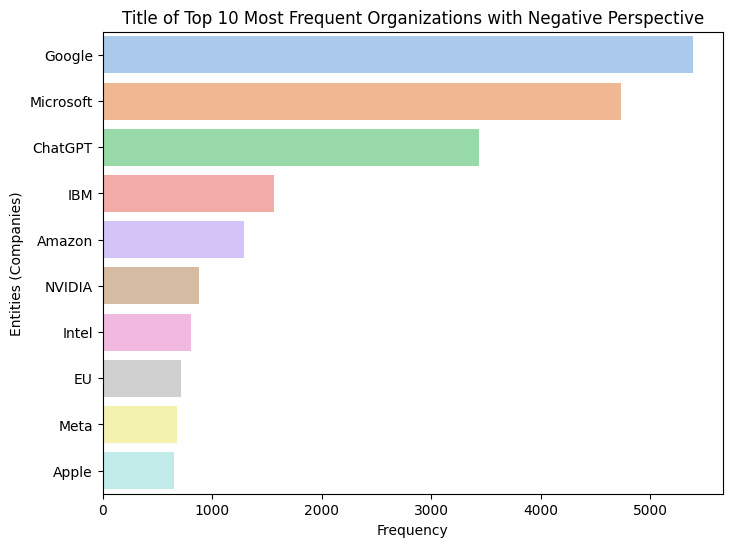

In [6]:
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x = top_10_title_org['count'], y = top_10_title_org['entities'], palette='pastel')
plt.title('Title of Top 10 Most Frequent Organizations with Negative Perspective')
plt.xlabel('Frequency')
plt.ylabel('Entities (Companies)')
plt.show()

**Person**

In [7]:
title_per_pos = title_ner[(title_ner['labels'] == 'PERSON') & (title_ner['Sentiment'] == 'Negative')]

top_title_per = title_per_pos['entities'].value_counts()

top_title_per_df = pd.DataFrame({'entities': top_title_per.index, 'count': top_title_per.values})

top_10_title_per = top_title_per_df[:10]

top_10_title_per

entities  count
0     Sam Altman   1416
1      Elon Musk    999
2      Joe Biden    592
3    Rishi Sunak    167
4          Putin    163
5         Harris    139
6   Donald Trump    136
7  Satya Nadella    128
8     Bill Gates    128
9        Roberts    107

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


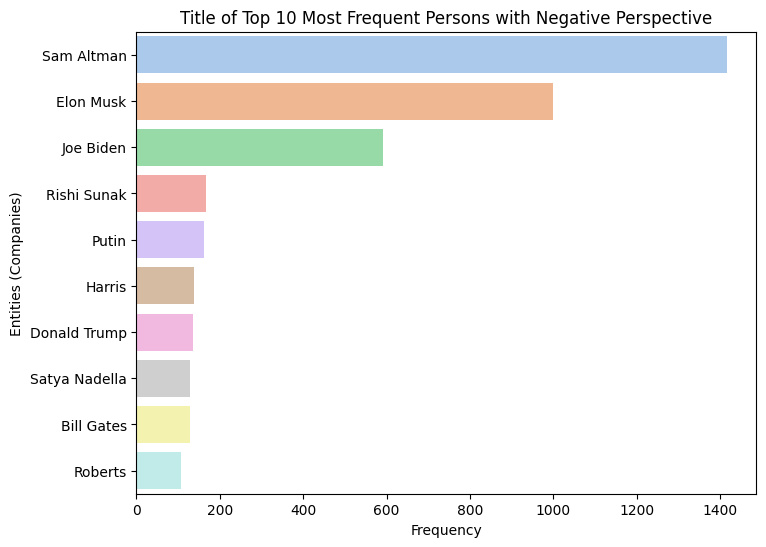

In [8]:
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x = top_10_title_per['count'], y = top_10_title_per['entities'], palette='pastel')
plt.title('Title of Top 10 Most Frequent Persons with Negative Perspective')
plt.xlabel('Frequency')
plt.ylabel('Entities (Companies)')
plt.show()

**Text NER**

In [9]:
text_ner = pd.read_parquet("gs://wisdom-final-nlp-final/NLP_Project/text_ner_cleaned.parquet", engine='pyarrow')
text_ner.head()

date                     entities labels Sentiment  \
0 2020-02-26                    LegalTech    ORG  Negative   
1 2020-02-26                         2019   DATE  Negative   
2 2020-02-26  Catalyst Repository Systems    ORG  Negative   
3 2020-02-26                    Australis   NORP  Negative   
4 2020-02-26  Wednesday, February 26 2020   DATE  Negative   

   Probability Negative  Probability Positive  
0                 0.605                 0.395  
1                 0.654                 0.346  
2                 0.618                 0.382  
3                 0.605                 0.395  
4                 0.716                 0.284

**Organization**

In [10]:
text_org_pos = text_ner[(text_ner['labels'] == 'ORG') & (text_ner['Sentiment'] == 'Negative')]

top_text_org = text_org_pos['entities'].value_counts()

top_text_org_df = pd.DataFrame({'entities': top_text_org.index, 'count': top_text_org.values})

top_10_text_org = top_text_org_df[:10]

top_10_text_org

entities   count
0                 Google  110069
1       Gray Media Group  104273
2              Microsoft   97081
3  Gray Television, Inc.   40111
4                 Amazon   33262
5                  Apple   26160
6                    IBM   25536
7                 NVIDIA   20325
8                     EU   19917
9                   Meta   17073

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


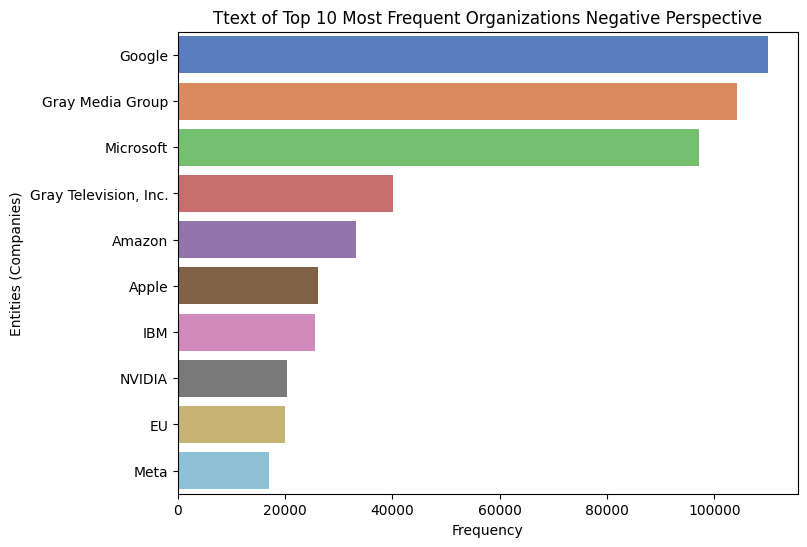

In [11]:
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x = top_10_text_org['count'], y = top_10_text_org['entities'], palette='muted')
plt.title('Ttext of Top 10 Most Frequent Organizations Negative Perspective')
plt.xlabel('Frequency')
plt.ylabel('Entities (Companies)')
plt.show()

**Person**

In [12]:
text_per_pos = text_ner[(text_ner['labels'] == 'PERSON') & (text_ner['Sentiment'] == 'Negative')]

top_text_per = text_per_pos['entities'].value_counts()

top_text_per_df = pd.DataFrame({'entities': top_text_per.index, 'count': top_text_per.values})

top_10_text_per = top_text_per_df[:10]

top_10_text_per

entities  count
0       Elon Musk  25014
1       Joe Biden  21677
2    Donald Trump  11434
3    Taylor Swift   5296
4   Satya Nadella   4017
5           Putin   3927
6   Sundar Pichai   3406
7         Schumer   3049
8  Kim Kardashian   3026
9     Rishi Sunak   3024

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


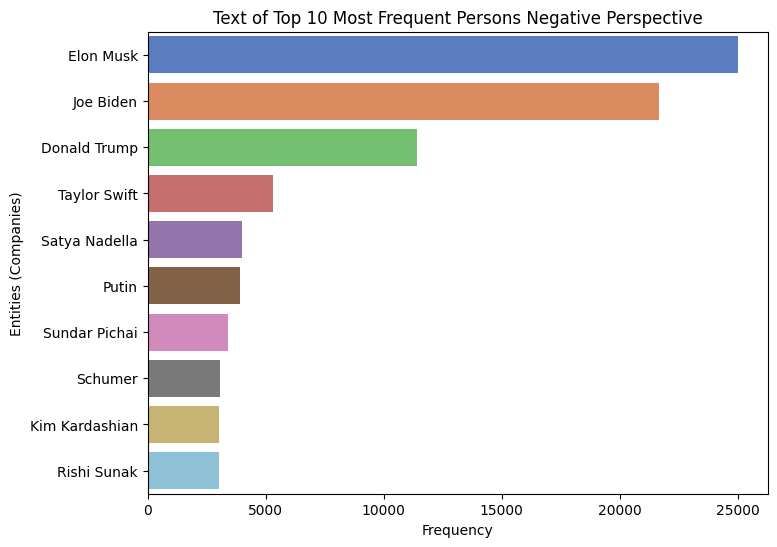

In [19]:
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x = top_10_text_per['count'], y = top_10_text_per['entities'], palette='muted')
plt.title('Text of Top 10 Most Frequent Persons Negative Perspective')
plt.xlabel('Frequency')
plt.ylabel('Entities (Companies)')
plt.show()

### 4.4 Leverage appropriate NLP techniques to identify organizations, people and locations, then apply targeted sentiment

#### 4.4.1 What types of companies (based on the lines of business) are planning to invest in these technologies today or near future (success stories)?

**Title NER**

In [79]:
title_ner.head()

date  \
1 2020-02-26   
2 2020-02-26   
3 2020-02-26   
5 2021-02-25   
6 2021-02-25   

                                                               entities  \
1                                                                  2019   
2                                           Catalyst Repository Systems   
3                                                             Australis   
5                                       MulticoreWare Inc. Becomes CEVA   
6  Trusted Partner Imaging & Computer Vision - Consumer Electronics Net   

  labels Sentiment  Probability Negative  Probability Positive  
1   DATE  Negative                 0.654                 0.346  
2    ORG  Negative                 0.618                 0.382  
3   NORP  Negative                 0.605                 0.395  
5    ORG  Negative                 0.574                 0.426  
6    ORG  Negative                 0.648                 0.352

In [80]:
title_companies_investing = title_ner[title_ner['labels'] == 'ORG']
title_companies_investing.head()

date  \
2  2020-02-26   
5  2021-02-25   
6  2021-02-25   
11 2021-01-10   
12 2021-01-10   

                                                                entities  \
2                                            Catalyst Repository Systems   
5                                        MulticoreWare Inc. Becomes CEVA   
6   Trusted Partner Imaging & Computer Vision - Consumer Electronics Net   
11                                                                  Avid   
12                                                          Alternatives   

   labels Sentiment  Probability Negative  Probability Positive  
2     ORG  Negative                 0.618                 0.382  
5     ORG  Negative                 0.574                 0.426  
6     ORG  Negative                 0.648                 0.352  
11    ORG  Negative                 0.605                 0.395  
12    ORG  Negative                 0.605                 0.395

/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(self._y))
/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(self._y))
/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(self._y))
/opt/conda/lib/pyth

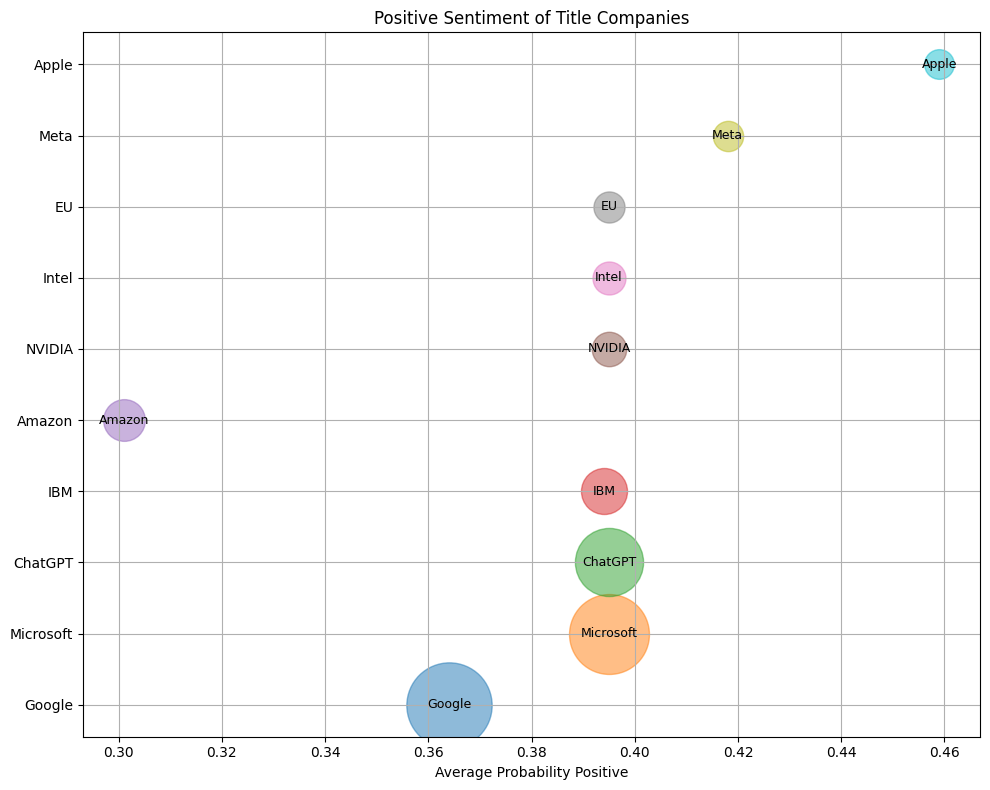

In [14]:
title_companies_investing = title_ner[title_ner['labels'] == 'ORG']

top_10_entities = title_companies_investing['entities'].value_counts().head(10)

# Filter the DataFrame to include only the top 10 entities
top_10_filtered_df = title_companies_investing[title_companies_investing['entities'].isin(top_10_entities.index)]

# Calculate the average "Probability Negative" for each of the top 10 entities
average_prob_negative_top_10 = top_10_filtered_df.groupby('entities')['Probability Positive'].mean().reset_index()

# Create a bubble chart
plt.figure(figsize=(10, 8))

# Plot each of the top 20 entity's average "Probability Negative"
for entity in top_10_entities.index:
    entity_average_prob_negative = average_prob_negative_top_10.loc[average_prob_negative_top_10['entities'] == entity, 'Probability Positive'].values
    # Ensure we extract a single scalar value
    if entity_average_prob_negative.size > 0:
        entity_average_prob_negative = entity_average_prob_negative[0]
    entity_count = top_10_entities[entity]
    plt.scatter(entity_average_prob_negative, entity, s=entity_count*0.7, alpha=0.5)  # Adjust the size scaling factor as needed
    plt.text(entity_average_prob_negative, entity, entity, ha='center', va='center', fontsize=9)

plt.xlabel('Average Probability Positive')
plt.title('Positive Sentiment of Title Companies')
plt.grid(True)  # Adding a grid for better readability
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(self._y))
/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(self._y))
/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(self._y))
/opt/conda/lib/pyth

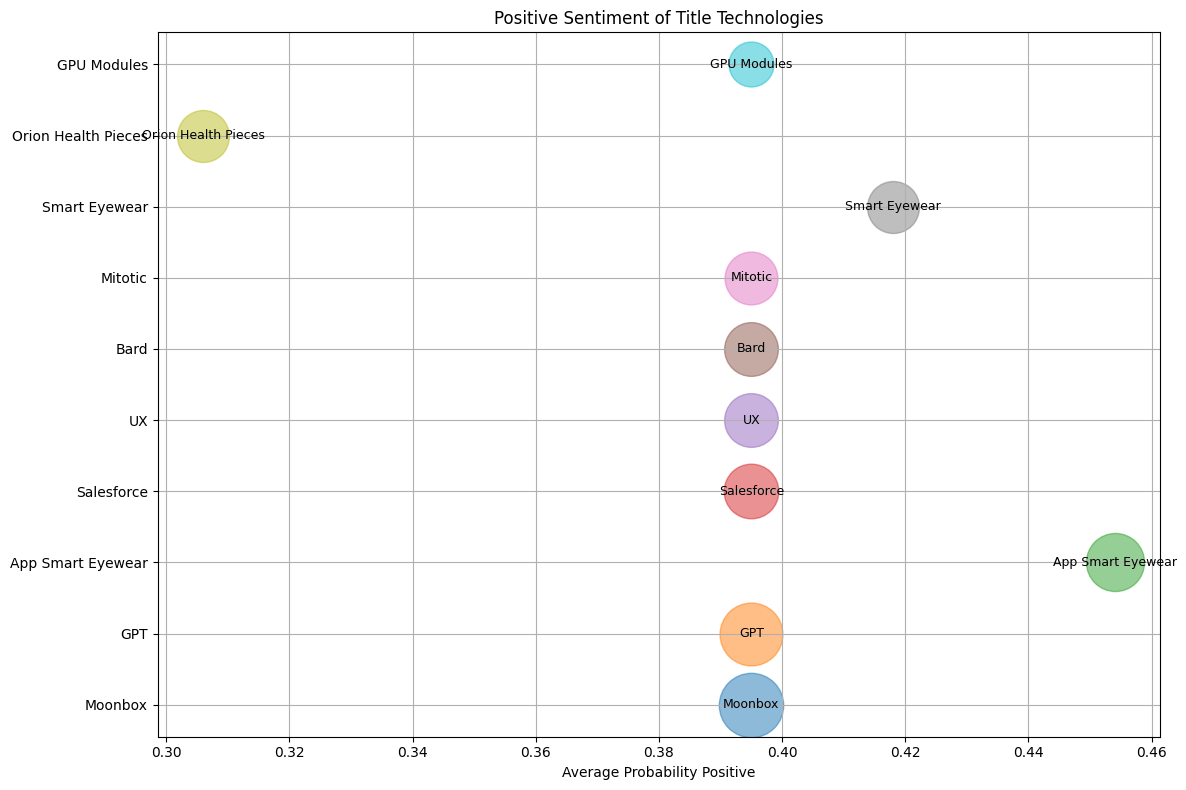

In [15]:
title_technologies = title_ner[title_ner['labels'] == 'PRODUCT']

# Get the top 10 technologies based on the frequency of occurrence
top_10_technologies = title_technologies['entities'].value_counts().head(10)

# Filter the DataFrame to include only the top 10 technologies
top_10_filtered_technologies = title_technologies[title_technologies['entities'].isin(top_10_technologies.index)]

# Calculate the average "Probability Positive" for each of the top 10 technologies
average_prob_positive_top_10 = top_10_filtered_technologies.groupby('entities')['Probability Positive'].mean().reset_index()

# Create a bubble chart
plt.figure(figsize=(12, 8))

# Plot each of the top 10 technology's average "Probability Positive"
for entity in top_10_technologies.index:
    entity_average_prob_positive = average_prob_positive_top_10.loc[average_prob_positive_top_10['entities'] == entity, 'Probability Positive'].values
    # Ensure we extract a single scalar value
    if entity_average_prob_positive.size > 0:
        entity_average_prob_positive = entity_average_prob_positive[0]
    entity_count = top_10_technologies[entity]
    plt.scatter(entity_average_prob_positive, entity, s=entity_count*50, alpha=0.5)  # Adjust the size scaling factor as needed
    plt.text(entity_average_prob_positive, entity, entity, ha='center', va='center', fontsize=9)

plt.xlabel('Average Probability Positive')
plt.title('Positive Sentiment of Title Technologies')
plt.grid(True)  # Adding a grid for better readability
plt.gca().yaxis.label.set_visible(False)  # Hide the y-axis label
plt.tight_layout()
plt.show()

**Text NER**

In [62]:
text_ner.head()

date                     entities labels Sentiment  \
0 2020-02-26                    LegalTech    ORG  Negative   
1 2020-02-26                         2019   DATE  Negative   
2 2020-02-26  Catalyst Repository Systems    ORG  Negative   
3 2020-02-26                    Australis   NORP  Negative   
4 2020-02-26  Wednesday, February 26 2020   DATE  Negative   

   Probability Negative  Probability Positive  
0                 0.605                 0.395  
1                 0.654                 0.346  
2                 0.618                 0.382  
3                 0.605                 0.395  
4                 0.716                 0.284

/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(self._y))
/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(self._y))
/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(self._y))
/opt/conda/lib/pyth

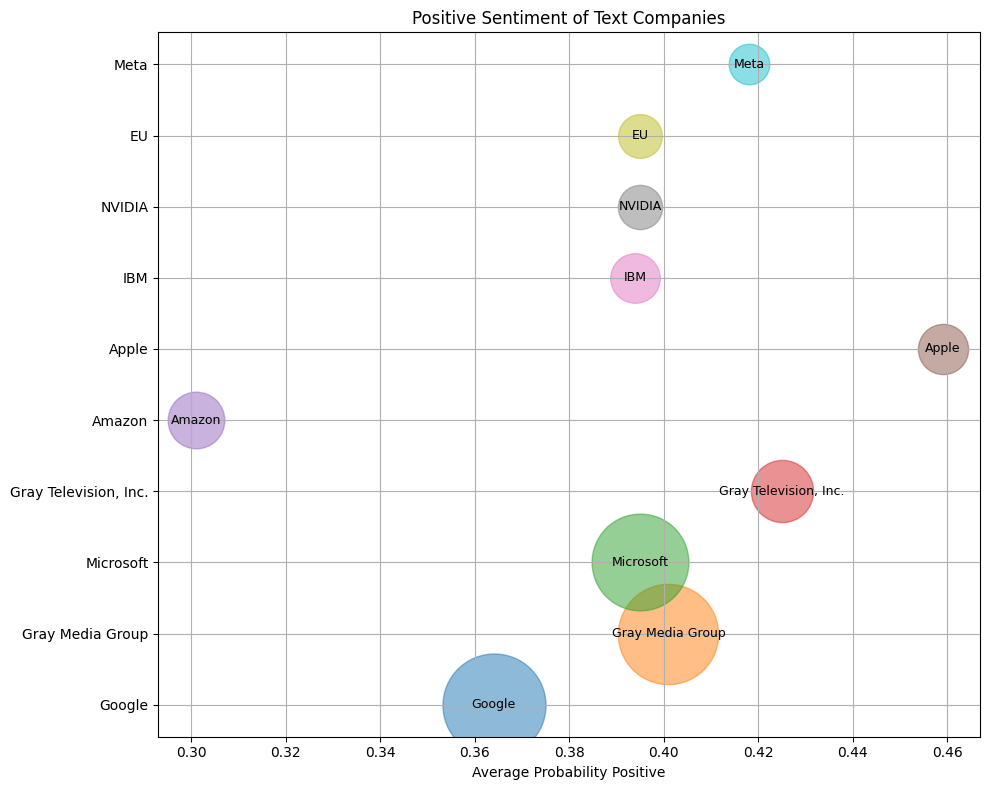

In [16]:
text_companies_investing = text_ner[text_ner['labels'] == 'ORG']

top_orgs = text_companies_investing['entities'].value_counts().head(10)

# Filter the DataFrame to include only the top organizations
top_filtered_orgs = text_companies_investing[text_companies_investing['entities'].isin(top_orgs.index)]

# Calculate the average sentiment for each of the top organizations
#'sentiment' is a column in 'text_companies_investing' that contains sentiment scores
average_sentiment_top_orgs = top_filtered_orgs.groupby('entities')['Probability Positive'].mean().reset_index()

# Create a bubble chart
plt.figure(figsize=(10, 8))

# Plot each of the top organization's average sentiment
for entity in top_orgs.index:
    entity_average_sentiment = average_sentiment_top_orgs.loc[average_sentiment_top_orgs['entities'] == entity, 'Probability Positive'].values
    # Ensure we extract a single scalar value
    if entity_average_sentiment.size > 0:
        entity_average_sentiment = entity_average_sentiment[0]
    entity_count = top_orgs[entity]
    plt.scatter(entity_average_sentiment, entity, s=entity_count*0.05, alpha=0.5)  # Adjust the size scaling factor as needed
    plt.text(entity_average_sentiment, entity, entity, ha='center', va='center', fontsize=9)

plt.xlabel('Average Probability Positive')
plt.title('Positive Sentiment of Text Companies')
plt.grid(True)  # Adding a grid for better readability
plt.gca().yaxis.label.set_visible(False)  # Hide the y-axis label
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(self._y))
/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(self._y))
/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(self._y))
/opt/conda/lib/pyth

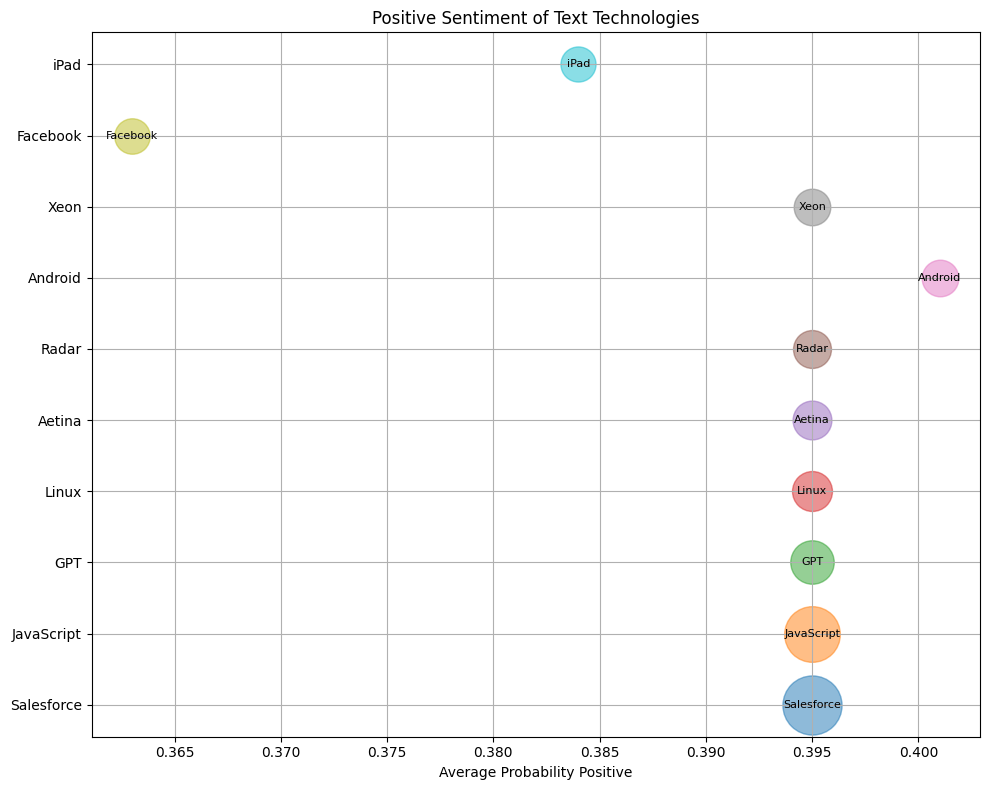

In [17]:
text_technologies = text_ner[text_ner['labels'] == 'PRODUCT']

# Get the top technologies based on the frequency of occurrence
top_technologies = text_technologies['entities'].value_counts().head(10)

# Filter the DataFrame to include only the top technologies
top_filtered_technologies = text_technologies[text_technologies['entities'].isin(top_technologies.index)]

# Calculate the average "Probability Positive" for each of the top technologies
average_prob_positive_top_technologies = top_filtered_technologies.groupby('entities')['Probability Positive'].mean().reset_index()

# Create a bubble chart
plt.figure(figsize=(10, 8))

# Plot each of the top technology's average "Probability Positive"
for entity in top_technologies.index:
    entity_average_prob_positive = average_prob_positive_top_technologies.loc[average_prob_positive_top_technologies['entities'] == entity, 'Probability Positive'].values
    # Ensure we extract a single scalar value
    if entity_average_prob_positive.size > 0:
        entity_average_prob_positive = entity_average_prob_positive[0]
    entity_count = top_technologies[entity]
    plt.scatter(entity_average_prob_positive, entity, s=entity_count*1, alpha=0.5)  # Adjust the size scaling factor as needed
    plt.text(entity_average_prob_positive, entity, entity, ha='center', va='center', fontsize = 8)

plt.xlabel('Average Probability Positive')
plt.title('Positive Sentiment of Text Technologies')
plt.grid(True)  # Adding a grid for better readability
plt.gca().yaxis.label.set_visible(False)  # Hide the y-axis label
plt.tight_layout()
plt.show()

#### 4.4.2 What types of applications cannot currently be transformed by AI, based on today's state of technology (failures)?

**Title NER**

In [18]:
title_ner_df_ai = pd.read_parquet("gs://wisdom-final-nlp-final/NLP_Project/title_ner_ai.parquet", engine='pyarrow')
title_ner_df_ai.head()

date      entities   labels Sentiment  Probability Negative  \
393  2022-02-18      Magellan  PRODUCT  Negative                 0.605   
1151 2023-10-13   FatBrain AI  PRODUCT  Negative                 0.597   
1317 2023-06-27  Malwarebytes  PRODUCT  Negative                 0.605   
1324 2023-01-20      Lensa AI  PRODUCT  Negative                 0.597   
1656 2021-03-28          SaaS  PRODUCT  Negative                 0.605   

      Probability Positive  
393                  0.395  
1151                 0.403  
1317                 0.395  
1324                 0.403  
1656                 0.395

/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is de

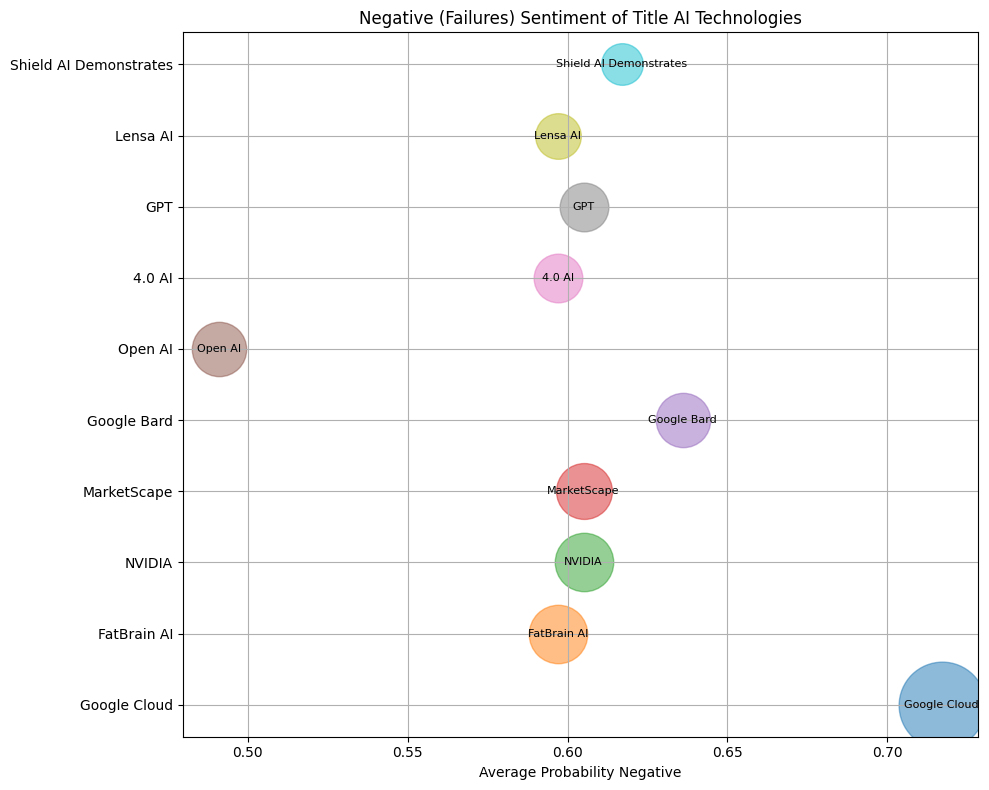

In [116]:
# Get the top technologies based on the frequency of occurrence
top_title_ai = title_ner_df_ai['entities'].value_counts().head(10)

# Filter the DataFrame to include only the top technologies
top_filtered_ai = title_ner_df_ai[title_ner_df_ai['entities'].isin(top_title_ai.index)]

# Calculate the average "Probability Positive" for each of the top technologies
average_prob_negative_top_ai = top_filtered_ai.groupby('entities')['Probability Negative'].mean().reset_index()

# Create a bubble chart
plt.figure(figsize=(10, 8))

# Plot each of the top technology's average "Probability Positive"
for entity in top_title_ai.index:
    entity_average_prob_negative = average_prob_negative_top_ai.loc[average_prob_negative_top_ai['entities'] == entity, 'Probability Negative'].values
    # Ensure we extract a single scalar value
    if entity_average_prob_negative.size > 0:
        entity_average_prob_negative = entity_average_prob_negative[0]
    entity_count = top_title_ai[entity]
    plt.scatter(entity_average_prob_negative, entity, s=entity_count*30, alpha=0.5)  # Adjust the size scaling factor as needed
    plt.text(entity_average_prob_negative, entity, entity, ha='center', va='center', fontsize = 8)

plt.xlabel('Average Probability Negative')
plt.title('Negative (Failures) Sentiment of Title AI Technologies')
plt.grid(True)  # Adding a grid for better readability
plt.gca().yaxis.label.set_visible(False)  # Hide the y-axis label
plt.tight_layout()
plt.show()

In [112]:
text_ner_df_ai = pd.read_parquet("gs://wisdom-final-nlp-final/NLP_Project/text_ner_ai.parquet", engine='pyarrow')
text_ner_df_ai.head()

date           entities   labels Sentiment  Probability Negative  \
437 2020-04-29         Salesforce  PRODUCT  Negative                 0.605   
531 2021-01-10  Conversational AI  PRODUCT  Negative                 0.597   
535 2021-01-10  Conversational AI  PRODUCT  Negative                 0.597   
538 2021-01-10  Conversational AI  PRODUCT  Negative                 0.597   
565 2021-01-10  Conversational AI  PRODUCT  Negative                 0.597   

     Probability Positive  
437                 0.395  
531                 0.403  
535                 0.403  
538                 0.403  
565                 0.403

/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:895: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is de

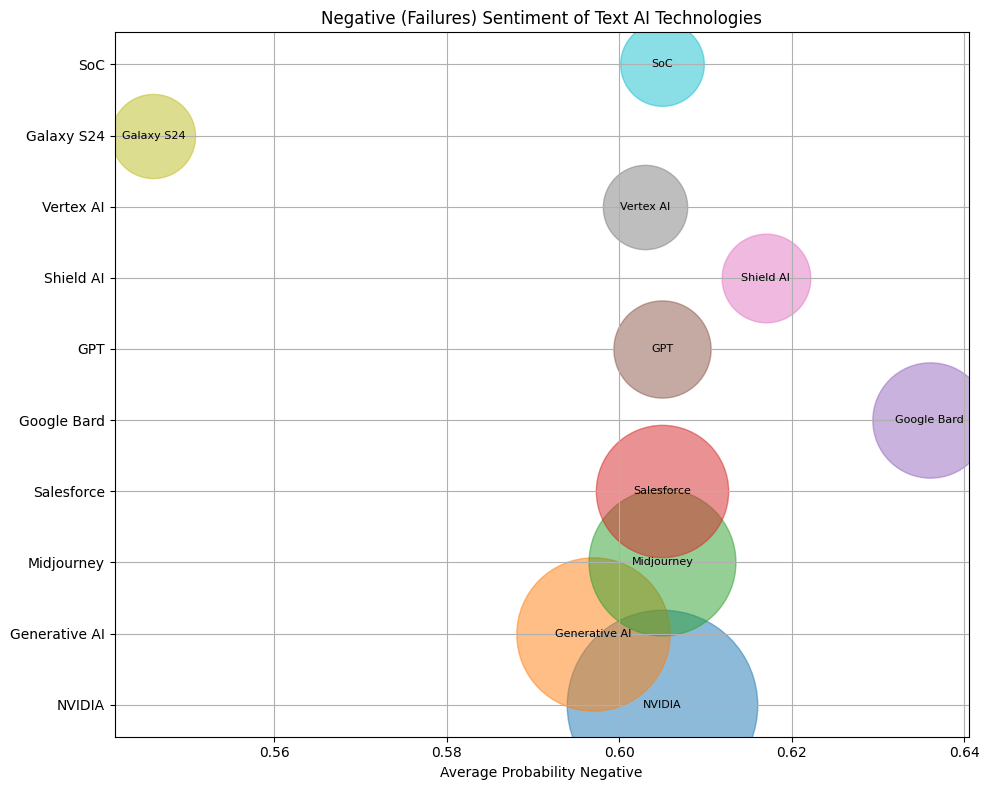

In [122]:
# Get the top technologies based on the frequency of occurrence
top_text_ai = text_ner_df_ai['entities'].value_counts().head(10)

# Filter the DataFrame to include only the top technologies
top_filtered_ai = text_ner_df_ai[text_ner_df_ai['entities'].isin(top_text_ai.index)]

# Calculate the average "Probability Positive" for each of the top technologies
average_prob_negative_top_ai = top_filtered_ai.groupby('entities')['Probability Negative'].mean().reset_index()

# Create a bubble chart
plt.figure(figsize=(10, 8))

# Plot each of the top technology's average "Probability Positive"
for entity in top_text_ai.index:
    entity_average_prob_negative = average_prob_negative_top_ai.loc[average_prob_negative_top_ai['entities'] == entity, 'Probability Negative'].values
    # Ensure we extract a single scalar value
    if entity_average_prob_negative.size > 0:
        entity_average_prob_negative = entity_average_prob_negative[0]
    entity_count = top_text_ai[entity]
    plt.scatter(entity_average_prob_negative, entity, s=entity_count*5, alpha=0.5)  # Adjust the size scaling factor as needed
    plt.text(entity_average_prob_negative, entity, entity, ha='center', va='center', fontsize = 8)

plt.xlabel('Average Probability Negative')
plt.title('Negative (Failures) Sentiment of Text AI Technologies')
plt.grid(True)  # Adding a grid for better readability
plt.gca().yaxis.label.set_visible(False)  # Hide the y-axis label
plt.tight_layout()
plt.show()